# The aim of this script to use lazy predict (https://github.com/shankarpandala/lazypredict) to build up a range of models quickly and evaluate their performance

The package version used in this script 

(note, changing the versions might lead to some errors)

In [12]:
conda list

# packages in environment at /Users/wintermute/opt/anaconda3/envs/modelbuilding:
#
# Name                    Version                   Build  Channel
_py-xgboost-mutex         2.0                       cpu_0    conda-forge
anyio                     3.6.2              pyhd8ed1ab_0    conda-forge
appnope                   0.1.3              pyhd8ed1ab_0    conda-forge
archspec                  0.2.1              pyhd8ed1ab_1    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0           py38hb991d35_3    conda-forge
asttokens                 2.2.1              pyhd8ed1ab_0    conda-forge
atk-1.0                   2.38.0               hcb7b3dd_1    conda-forge
attrs                     22.2.0             pyh71513ae_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                pyhd8ed1ab_3    conda-forge
backports.functools_lru_cache 1.6.4            


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

## RMSF 442 residues only as X vs lnv as Y

### lnv as only Y variable

In [10]:
# read the excel data of the rmsf of 442 residues and their aggregation rates

rmsf_agg = pd.read_excel("rmsf_442residues_agg.xlsx",index_col=0)

# Select the columns 0 to 441 as predictor variables (X)

X = rmsf_agg.iloc[:, 0:442]  

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = rmsf_agg['ln(v)']  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 21%|█████████▍                                  | 9/42 [00:02<00:10,  3.16it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 62%|██████████████████████████▌                | 26/42 [00:06<00:02,  5.36it/s]

LassoLarsIC model failed to execute
You are using LassoLarsIC in the case where the number of samples is smaller than the number of features. In this setting, getting a good estimate for the variance of the noise is not possible. Provide an estimate of the noise variance in the constructor.


 76%|████████████████████████████████▊          | 32/42 [00:06<00:01,  9.80it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 39.


100%|███████████████████████████████████████████| 42/42 [00:06<00:00,  6.15it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.057444
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,83484922623407747170828288.00,-4016552388437284298055221248.00,245091531324330.03,0.13
QuantileRegressor,1.04,-0.74,5.10,0.04
OrthogonalMatchingPursuit,1.04,-0.70,5.05,0.01
DecisionTreeRegressor,1.03,-0.44,4.64,0.02
ExtraTreeRegressor,1.03,-0.38,4.54,0.01
XGBRegressor,1.03,-0.22,4.27,0.09
GaussianProcessRegressor,1.02,-0.03,3.92,0.01
DummyRegressor,1.02,-0.02,3.91,0.01
HistGradientBoostingRegressor,1.02,-0.02,3.91,0.10


### lnv and Tm as two Y variables

In [13]:
# read the excel data of the rmsf of 442 residues and their aggregation rates

rmsf_agg = pd.read_excel("rmsf_442residues_agg.xlsx",index_col=0)

# Select the columns 0 to 441 as predictor variables (X)

X = rmsf_agg.iloc[:, 0:442]  

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' and 'Tm' are the target Y variables

Y = rmsf_agg[['Tm', 'ln(v)']] 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 10%|████▏                                       | 4/42 [00:00<00:00, 39.89it/s]

AdaBoostRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
BayesianRidge model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
ElasticNetCV model failed to execute
For multi-task outputs, use MultiTaskElasticNetCV


 21%|█████████▍                                  | 9/42 [00:00<00:01, 17.31it/s]

GammaRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
GradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
HistGradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
HuberRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.


 40%|█████████████████▍                         | 17/42 [00:00<00:01, 20.09it/s]

LarsCV model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
LassoCV model failed to execute
For multi-task outputs, use MultiTaskLassoCV
LassoLarsCV model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
LassoLarsIC model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
LinearSVR model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.


 62%|██████████████████████████▌                | 26/42 [00:01<00:00, 22.30it/s]

NuSVR model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
OrthogonalMatchingPursuitCV model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
PassiveAggressiveRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
PoissonRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
QuantileRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 39.


 93%|███████████████████████████████████████▉   | 39/42 [00:01<00:00, 20.58it/s]

SGDRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
SVR model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
TweedieRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.


100%|███████████████████████████████████████████| 42/42 [00:02<00:00, 19.37it/s]

LGBMRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,4422323249223712893251464209227269013504.00,-212762885212651976775193873122746513227776.00,1783813814271569297408.00,0.29
GaussianProcessRegressor,4.57,-170.83,53.61,0.01
KernelRidge,4.52,-168.46,53.24,0.01
MLPRegressor,1.34,-15.18,16.44,0.28
ExtraTreeRegressor,1.11,-4.22,9.26,0.01
OrthogonalMatchingPursuit,1.08,-2.91,7.99,0.02
DecisionTreeRegressor,1.08,-2.86,7.95,0.02
LinearRegression,1.03,-0.65,5.22,0.01
TransformedTargetRegressor,1.03,-0.65,5.22,0.03


# SASA of 7 APRs, RMSF vs lnv

In [44]:
import pandas as pd

# Read SASA of 7 APR data from the excel 
sasa_apr = pd.read_excel("SASA_7APRs_54conditions231023.xlsx",index_col=0)

# read the excel data of the rmsf of 442 residues and their aggregation rates

rmsf_agg = pd.read_excel("rmsf_442residues_agg.xlsx",index_col=0)

# add a column of the sum of SASA of all APRs
sasa_apr["sum_aprsasa"] = sasa_apr.sum(axis = 1)

rmsf_sasa_agg = pd.concat([sasa_apr,rmsf_agg],axis=1,join='inner')

# Save the dataframe into an excel file
# rmsf_sasa_agg.to_excel("rmsf_sasa_agg311023.xlsx")

In [9]:
rmsf_sasa_agg

,r_31-36,r_47-51,r_114-118,r_129-139,r_261-265,r_325-329,r_387-402,sum_aprsasa,0,1,...,434,435,436,437,438,439,440,441,Tm,ln(v)
3_5_277_0,0.37,0.02,0.25,0.18,-0.11,0.07,0.58,1.38,0.23,0.16,...,0.35,0.51,0.50,0.60,0.67,0.79,0.93,1.07,73.70,-5.95
8_338_0,0.71,0.57,0.32,0.15,0.58,0.54,0.22,3.09,0.29,0.21,...,0.41,0.48,0.59,0.62,0.67,0.75,0.84,0.96,77.89,1.62
3_5_338_100,0.61,0.44,0.87,1.05,0.09,0.14,1.69,4.88,0.30,0.22,...,0.49,0.61,0.67,0.68,0.67,0.72,0.81,0.92,62.48,9.01
3_5_338_200,1.13,0.58,0.48,0.85,0.65,0.56,1.47,5.72,0.35,0.29,...,0.41,0.56,0.57,0.66,0.70,0.76,0.86,0.98,60.65,9.64
5_5_296_250,0.28,0.09,0.08,0.49,0.27,0.18,0.31,1.69,0.24,0.16,...,0.32,0.52,0.50,0.52,0.59,0.69,0.75,0.90,80.72,-3.76
9_338_200,1.05,0.47,0.25,0.76,0.28,0.41,1.12,4.34,0.24,0.16,...,0.41,0.53,0.52,0.51,0.57,0.67,0.76,0.90,77.35,2.47
318K_7_250M,0.73,0.45,0.29,0.21,0.31,0.27,0.50,2.75,0.25,0.18,...,0.40,0.50,0.54,0.54,0.59,0.74,0.86,1.01,77.93,-2.71
3_5_277_50,0.37,0.24,0.10,0.13,0.10,-0.05,0.06,0.96,0.28,0.21,...,0.34,0.42,0.51,0.54,0.56,0.67,0.81,0.95,64.95,-4.38
296K_7_50M,0.15,0.08,0.11,-0.21,0.25,0.08,-0.17,0.28,0.25,0.17,...,0.31,0.43,0.49,0.54,0.59,0.65,0.72,0.86,77.97,-4.65
4_5_296_250,0.66,0.29,0.44,0.50,0.34,0.39,0.20,2.82,0.26,0.18,...,0.36,0.51,0.52,0.62,0.70,0.75,0.81,0.91,73.07,-4.19


### Using 7 APRs plus their sum, RMSF residues as features to fit into models with one Y variable lnv

In [8]:
# Select the columns 0 to 441 as predictor variables (X)

X = rmsf_sasa_agg.iloc[:, 0:449]  

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = rmsf_agg['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 21%|█████████▍                                  | 9/42 [00:09<00:37,  1.14s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 62%|██████████████████████████▌                | 26/42 [00:16<00:07,  2.26it/s]

LassoLarsIC model failed to execute
You are using LassoLarsIC in the case where the number of samples is smaller than the number of features. In this setting, getting a good estimate for the variance of the noise is not possible. Provide an estimate of the noise variance in the constructor.


 76%|████████████████████████████████▊          | 32/42 [00:16<00:02,  4.62it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 39.


100%|███████████████████████████████████████████| 42/42 [00:17<00:00,  2.45it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.057444
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LarsCV,272913971101401678440562688.00,-13342460809401860690047664128.00,446703705707085.06,0.75
Lars,272913971101401678440562688.00,-13342460809401860690047664128.00,446703705707085.06,0.13
SGDRegressor,1.16,-6.61,10.67,0.01
OrthogonalMatchingPursuit,1.10,-3.75,8.42,0.01
ExtraTreeRegressor,1.06,-2.07,6.78,0.01
LinearRegression,1.05,-1.58,6.22,0.01
TransformedTargetRegressor,1.05,-1.58,6.22,0.01
HuberRegressor,1.05,-1.58,6.22,0.04
LinearSVR,1.05,-1.58,6.21,0.02


#### Using 7 APRs plus their sum, RMSF residues as features to fit into models with two Y variable lnv, Tm

In [14]:
# Select the columns 0 to 441 as predictor variables (X)

X = rmsf_sasa_agg.iloc[:, 0:449]  

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = rmsf_agg[['ln(v)','Tm']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 10%|████▏                                       | 4/42 [00:00<00:01, 36.58it/s]

AdaBoostRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
BayesianRidge model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
ElasticNetCV model failed to execute
For multi-task outputs, use MultiTaskElasticNetCV


 21%|█████████▍                                  | 9/42 [00:00<00:01, 17.17it/s]

GammaRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
GradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
HistGradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
HuberRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.


 40%|█████████████████▍                         | 17/42 [00:00<00:01, 20.19it/s]

LarsCV model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
LassoCV model failed to execute
For multi-task outputs, use MultiTaskLassoCV
LassoLarsCV model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
LassoLarsIC model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
LinearSVR model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.


 62%|██████████████████████████▌                | 26/42 [00:01<00:00, 22.24it/s]

NuSVR model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
OrthogonalMatchingPursuitCV model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
PassiveAggressiveRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
PoissonRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
QuantileRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 39.


 81%|██████████████████████████████████▊        | 34/42 [00:01<00:00, 17.31it/s]

SGDRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
SVR model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.
TweedieRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.


100%|███████████████████████████████████████████| 42/42 [00:02<00:00, 20.19it/s]

LGBMRegressor model failed to execute
y should be a 1d array, got an array of shape (39, 2) instead.


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,752859799534714965588967424.00,-36806479088363846304998096896.00,742538127977273.00,0.28
KernelRidge,4.56,-172.82,53.91,0.01
GaussianProcessRegressor,4.51,-170.83,53.61,0.01
OrthogonalMatchingPursuit,1.57,-26.77,21.46,0.02
MLPRegressor,1.34,-15.83,16.74,0.28
TransformedTargetRegressor,1.09,-3.51,8.55,0.02
LinearRegression,1.09,-3.51,8.55,0.01
Ridge,1.09,-3.37,8.42,0.01
RidgeCV,1.07,-2.46,7.48,0.01


#### Using 7 APRs, RMSF 442 residues and one Y variable

In [15]:
# Select the columns as predictor variables (X)

X = rmsf_sasa_agg.drop(['sum_aprsasa','Tm','ln(v)'],axis = 1)

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = rmsf_agg['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 21%|█████████▍                                  | 9/42 [00:09<00:37,  1.15s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 62%|██████████████████████████▌                | 26/42 [00:16<00:07,  2.25it/s]

LassoLarsIC model failed to execute
You are using LassoLarsIC in the case where the number of samples is smaller than the number of features. In this setting, getting a good estimate for the variance of the noise is not possible. Provide an estimate of the noise variance in the constructor.


 76%|████████████████████████████████▊          | 32/42 [00:16<00:02,  4.48it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 39.


100%|███████████████████████████████████████████| 42/42 [00:17<00:00,  2.45it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.057444
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,42322976509589019412135936.00,-2069123296024352182316826624.00,175911719003800.28,0.13
LarsCV,42322976509589019412135936.00,-2069123296024352182316826624.00,175911719003800.28,0.75
SGDRegressor,1.18,-7.82,11.49,0.01
OrthogonalMatchingPursuit,1.10,-3.75,8.42,0.01
HuberRegressor,1.05,-1.55,6.18,0.04
TransformedTargetRegressor,1.05,-1.55,6.17,0.01
LinearRegression,1.05,-1.55,6.17,0.01
LinearSVR,1.05,-1.55,6.17,0.02
DecisionTreeRegressor,1.05,-1.54,6.16,0.02


### Using 7 APRs, mean RMSF and one Y variable

In [22]:
# Read SASA of 7 APR data from the excel 
sasa_apr = pd.read_excel("SASA_7APRs_54conditions231023.xlsx",index_col=0)

# read the excel data of the mean rmsf and their aggregation rates

mean_rmsf = pd.read_excel("mean_rmsf_agg.xlsx",index_col=0)

# add a column of the sum of SASA of all APRs
sasa_apr["sum_aprsasa"] = sasa_apr.sum(axis = 1)

mean_rmsf_sasa_agg = pd.concat([sasa_apr,mean_rmsf],axis=1,join='inner')

#### 7 APRs, mean RMSF

In [23]:
# Select the columns as predictor variables (X)

X = mean_rmsf_sasa_agg.drop(['sum_aprsasa','Tm','ln(v)'],axis = 1)

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = mean_rmsf_sasa_agg['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 31%|█████████████▎                             | 13/42 [00:00<00:00, 47.53it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 81%|██████████████████████████████████▊        | 34/42 [00:00<00:00, 67.22it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|███████████████████████████████████████████| 42/42 [00:00<00:00, 66.28it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.841535
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,-3.21,0.53,1.86,0.05
OrthogonalMatchingPursuitCV,-3.42,0.51,1.90,0.01
OrthogonalMatchingPursuit,-3.42,0.51,1.90,0.01
LassoCV,-4.08,0.44,2.04,0.03
LarsCV,-4.08,0.44,2.04,0.01
LassoLarsCV,-4.08,0.44,2.04,0.01
LassoLarsIC,-4.15,0.43,2.05,0.01
LassoLars,-4.24,0.42,2.07,0.00
Lasso,-4.24,0.42,2.07,0.00


#### Using sum value of 7 APRs, mean RMSF, one variable Y lnv

In [24]:
mean_rmsf_sasa_agg

,r_31-36,r_47-51,r_114-118,r_129-139,r_261-265,r_325-329,r_387-402,sum_aprsasa,mean RMSF,Tm,ln(v)
3_5_277_0,0.37,0.02,0.25,0.18,-0.11,0.07,0.58,1.38,0.14,73.70,-5.95
8_338_0,0.71,0.57,0.32,0.15,0.58,0.54,0.22,3.09,0.18,77.89,1.62
3_5_338_100,0.61,0.44,0.87,1.05,0.09,0.14,1.69,4.88,0.18,62.48,9.01
3_5_338_200,1.13,0.58,0.48,0.85,0.65,0.56,1.47,5.72,0.19,60.65,9.64
5_5_296_250,0.28,0.09,0.08,0.49,0.27,0.18,0.31,1.69,0.14,80.72,-3.76
9_338_200,1.05,0.47,0.25,0.76,0.28,0.41,1.12,4.34,0.17,77.35,2.47
318K_7_250M,0.73,0.45,0.29,0.21,0.31,0.27,0.50,2.75,0.16,77.93,-2.71
3_5_277_50,0.37,0.24,0.10,0.13,0.10,-0.05,0.06,0.96,0.13,64.95,-4.38
296K_7_50M,0.15,0.08,0.11,-0.21,0.25,0.08,-0.17,0.28,0.15,77.97,-4.65
4_5_296_250,0.66,0.29,0.44,0.50,0.34,0.39,0.20,2.82,0.15,73.07,-4.19


In [29]:
# Select the columns as predictor variables (X)

X = mean_rmsf_sasa_agg[['sum_aprsasa','mean RMSF']]

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = mean_rmsf_sasa_agg['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 31%|█████████████▎                             | 13/42 [00:00<00:00, 47.34it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 81%|██████████████████████████████████▊        | 34/42 [00:00<00:00, 71.46it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.841535
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that

100%|███████████████████████████████████████████| 42/42 [00:00<00:00, 67.09it/s]

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SVR,0.58,0.67,1.56,0.00
KernelRidge,0.50,0.61,1.69,0.00
BaggingRegressor,0.38,0.52,1.88,0.02
DecisionTreeRegressor,0.37,0.51,1.90,0.00
OrthogonalMatchingPursuitCV,0.37,0.51,1.90,0.01
OrthogonalMatchingPursuit,0.37,0.51,1.90,0.01
RandomForestRegressor,0.31,0.46,1.99,0.07
LassoLars,0.27,0.43,2.05,0.00
Lasso,0.27,0.43,2.05,0.00


# Native contacts, SASA, RMSF vs lnv

##### clean the nc dataframe to make it under cleaned condition names, not need to run again. Reading the excel file directly below - no use anymore. The native contacts used here is actually the fraction of salt bridges

In [34]:
import re 
import pandas as pd
import numpy as np

# Read SASA of 7 APR data from the excel 
sasa_apr = pd.read_excel("SASA_7APRs_54conditions231023.xlsx",index_col=0)

# read the excel data of the rmsf of 442 residues and their aggregation rates

rmsf_agg = pd.read_excel("rmsf_442residues_agg.xlsx",index_col=0)

# add a column of the sum of SASA of all APRs
sasa_apr["sum_aprsasa"] = sasa_apr.sum(axis = 1)

# Read the 54 condition names
run54 = pd.read_excel("54ConditionName120923.xlsx",index_col=0)


# Read Native contacts from the excel
nc = pd.read_excel("54DCDNativeContact311023.xlsx",index_col = 1)
nc = nc.drop(nc.columns[0],axis=1)

# clean the nc dataframe to make it under cleaned condition names
# average the replicas

nc_avg = []

for i in list(run54['Condition']):
    
    avg = []
    
    # loop over the rows in a dataframe
    for index, row in nc.iterrows():
        
        # search for any matching
        if re.search(i,index):
            
            data = row['Average native contact (last 50ns)']
            
            avg.append(data)
            
    # calculate the mean value of the six replicas for each condition
    avg = np.mean(avg)
    
    # append the condition info as well as the calculated mean native contacts into a list
    nc_avg.append([i,avg])
    
    
    
# convert the list to a dataframe   
df_nc_avg = pd.DataFrame(nc_avg)

# assign column names
df_nc_avg.columns = ['Condition','Average native contact (last 50ns)']

nc_updated = df_nc_avg

# Write the new dataframe into an excel file
#nc_updated.to_excel("nc_updated311023.xlsx")

### 061123 Updated native contact version 

##### updated version of native contacts, 06/11/23, after using alpha carbon to calculate the native contacts instead of the salt bridges, this version seems much better

In [4]:
import re 
import pandas as pd
import numpy as np

# Read the 54 condition names
run54 = pd.read_excel("54ConditionName120923.xlsx",index_col=0)

# Read Native contacts from the excel
nc = pd.read_excel("NativeContacts_AlphaCarbon061123.xlsx",index_col = 0)

# clean the nc dataframe to make it under cleaned condition names
# average the replicas

nc_avg = []

for i in list(run54['Condition']):
    
    avg = []
    
    # loop over the rows in a dataframe
    for index, row in nc.iterrows():
        
        # search for any matching
        if re.search(i,index):
            
            data = row['Average native contact (last 50ns)']
            
            avg.append(data)
            
    # calculate the mean value of the six replicas for each condition
    avg = np.mean(avg)
    
    # append the condition info as well as the calculated mean native contacts into a list
    nc_avg.append([i,avg])
    
    
    
# convert the list to a dataframe   
df_nc_avg = pd.DataFrame(nc_avg)

# assign column names
df_nc_avg.columns = ['Condition','Average native contact (last 50ns)']

nc_updated = df_nc_avg

# Write the new dataframe into an excel file
#nc_updated.to_excel("nc_updated061123.xlsx")

#### Read files

In [1]:
import pandas as pd

# Read SASA of 7 APR data from the excel 
sasa_apr = pd.read_excel("SASA_7APRs_54conditions231023.xlsx",index_col=0)

# read the excel data of the rmsf of 442 residues and their aggregation rates

rmsf_agg = pd.read_excel("rmsf_442residues_agg.xlsx",index_col=0)

# add a column of the sum of SASA of all APRs
sasa_apr["sum_aprsasa"] = sasa_apr.sum(axis = 1)

# Read the 54 condition names
run54 = pd.read_excel("54ConditionName120923.xlsx",index_col=0)


# Read Native contacts from the excel, set the condition column as the index column 
nc = pd.read_excel("nc_updated061123.xlsx",index_col = 1)

# Drop the first column
nc = nc.drop(nc.columns[0],axis=1)

# join all the three features (nc, sasa_apr, rmsf_agg) together into one dataframe
rmsf_sasa_nc_agg = pd.concat([nc,sasa_apr,rmsf_agg],axis=1,join='inner')

# save the joined dataframe into an excel
#rmsf_sasa_nc_agg.to_excel("rmsf_sasa_nc_agg061123.xlsx")

# read the excel data of the mean rmsf and their aggregation rates

mean_rmsf = pd.read_excel("mean_rmsf_agg.xlsx",index_col=0)

# join the dataframes
mean_rmsf_nc_sasa_agg = pd.concat([nc,sasa_apr,mean_rmsf],axis=1,join='inner')

# save the dataframe to an excel file
#mean_rmsf_nc_sasa_agg.to_excel("mean_rmsf_nc_sasa_agg061123.xlsx")

In [3]:
rmsf_sasa_nc_agg

,Average native contact (last 50ns),r_31-36,r_47-51,r_114-118,r_129-139,r_261-265,r_325-329,r_387-402,sum_aprsasa,0,...,434,435,436,437,438,439,440,441,Tm,ln(v)
3_5_277_0,0.820499,0.372220,0.023772,0.248029,0.184549,-0.106773,0.074636,0.584502,1.380934,0.229217,...,0.349617,0.509233,0.501117,0.595050,0.667800,0.792517,0.927817,1.074250,73.701367,-5.945103
8_338_0,0.813804,0.705146,0.574838,0.322555,0.146747,0.584262,0.538368,0.215657,3.087574,0.286467,...,0.405200,0.479533,0.591867,0.620917,0.665867,0.750983,0.835967,0.958483,77.892600,1.616794
3_5_338_100,0.814145,0.613732,0.438593,0.867235,1.049615,0.087918,0.135492,1.691235,4.883820,0.298733,...,0.490417,0.607817,0.673150,0.678400,0.668417,0.716683,0.807917,0.920850,62.479633,9.005473
3_5_338_200,0.810917,1.129000,0.583300,0.484156,0.852628,0.649509,0.559015,1.466892,5.724500,0.352150,...,0.405183,0.560083,0.568283,0.656867,0.695467,0.764033,0.856450,0.980267,60.646233,9.639418
5_5_296_250,0.820969,0.284520,0.088570,0.077634,0.488544,0.266072,0.176160,0.309203,1.690703,0.239733,...,0.315033,0.515617,0.495950,0.520133,0.589450,0.686967,0.750683,0.903700,80.722867,-3.761981
9_338_200,0.814184,1.047581,0.471270,0.245948,0.763151,0.281167,0.409509,1.124270,4.342896,0.243767,...,0.406017,0.528150,0.520517,0.514933,0.566883,0.667283,0.757550,0.899117,77.352967,2.465767
318K_7_250M,0.818584,0.729646,0.450002,0.285218,0.210840,0.305323,0.266757,0.501578,2.749363,0.247417,...,0.398533,0.501817,0.543967,0.542017,0.588100,0.735283,0.860633,1.007450,77.927800,-2.707400
3_5_277_50,0.821139,0.373968,0.244099,0.102368,0.128406,0.101589,-0.050058,0.063959,0.964329,0.278683,...,0.340067,0.418300,0.510983,0.543333,0.557850,0.674300,0.814950,0.953750,64.945700,-4.382091
296K_7_50M,0.818804,0.150209,0.082233,0.106338,-0.214087,0.246922,0.080754,-0.174400,0.277970,0.248700,...,0.312850,0.433867,0.493667,0.538867,0.592667,0.649450,0.715367,0.859633,77.966100,-4.651000
4_5_296_250,0.817770,0.661202,0.293401,0.436353,0.503143,0.339889,0.385584,0.198846,2.818418,0.259933,...,0.358617,0.513183,0.517867,0.617500,0.704833,0.752300,0.809233,0.914100,73.072733,-4.193857


#### Using 7 APRs, RMSF442 residues, nc, one variable Y

In [6]:
# Select the columns as predictor variables (X)

X = rmsf_sasa_nc_agg.drop(['sum_aprsasa','Tm','ln(v)'],axis = 1)

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = rmsf_sasa_nc_agg['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 21%|█████████▍                                  | 9/42 [00:03<00:13,  2.53it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 55%|███████████████████████▌                   | 23/42 [00:06<00:05,  3.22it/s]

LassoLarsIC model failed to execute
You are using LassoLarsIC in the case where the number of samples is smaller than the number of features. In this setting, getting a good estimate for the variance of the noise is not possible. Provide an estimate of the noise variance in the constructor.


 76%|████████████████████████████████▊          | 32/42 [00:07<00:01,  7.37it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 39.


100%|███████████████████████████████████████████| 42/42 [00:08<00:00,  5.04it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.841535
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,576692419464267177082237222912.00,-28257928553749094421410646851584.00,14432373703680722.00,0.14
OrthogonalMatchingPursuit,1.06,-2.06,4.75,0.01
QuantileRegressor,1.06,-1.98,4.69,0.13
HistGradientBoostingRegressor,1.05,-1.46,4.26,0.13
DummyRegressor,1.05,-1.46,4.26,0.01
LGBMRegressor,1.05,-1.46,4.26,0.09
GaussianProcessRegressor,1.04,-0.81,3.65,0.02
OrthogonalMatchingPursuitCV,1.02,-0.22,2.99,0.03
SGDRegressor,1.02,-0.16,2.92,0.01


####  sum SASA of 7 APRs, average native contacts of last 50ns, mean RMSF, one varaible Y lnv

In [18]:
mean_rmsf_nc_sasa_agg

,Average native contact (last 50ns),r_31-36,r_47-51,r_114-118,r_129-139,r_261-265,r_325-329,r_387-402,sum_aprsasa,mean RMSF,Tm,ln(v)
3_5_277_0,0.82,0.37,0.02,0.25,0.18,-0.11,0.07,0.58,1.38,0.14,73.70,-5.95
8_338_0,0.81,0.71,0.57,0.32,0.15,0.58,0.54,0.22,3.09,0.18,77.89,1.62
3_5_338_100,0.81,0.61,0.44,0.87,1.05,0.09,0.14,1.69,4.88,0.18,62.48,9.01
3_5_338_200,0.81,1.13,0.58,0.48,0.85,0.65,0.56,1.47,5.72,0.19,60.65,9.64
5_5_296_250,0.82,0.28,0.09,0.08,0.49,0.27,0.18,0.31,1.69,0.14,80.72,-3.76
9_338_200,0.81,1.05,0.47,0.25,0.76,0.28,0.41,1.12,4.34,0.17,77.35,2.47
318K_7_250M,0.82,0.73,0.45,0.29,0.21,0.31,0.27,0.50,2.75,0.16,77.93,-2.71
3_5_277_50,0.82,0.37,0.24,0.10,0.13,0.10,-0.05,0.06,0.96,0.13,64.95,-4.38
296K_7_50M,0.82,0.15,0.08,0.11,-0.21,0.25,0.08,-0.17,0.28,0.15,77.97,-4.65
4_5_296_250,0.82,0.66,0.29,0.44,0.50,0.34,0.39,0.20,2.82,0.15,73.07,-4.19


In [10]:
# read the excel data of the mean rmsf and their aggregation rates

mean_rmsf = pd.read_excel("mean_rmsf_nc_sasa_agg061123.xlsx",index_col=0)

# Select the columns as predictor variables (X)

X = mean_rmsf_nc_sasa_agg[['Average native contact (last 50ns)','sum_aprsasa','mean RMSF']]

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = mean_rmsf_nc_sasa_agg['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 33%|██████████████▎                            | 14/42 [00:00<00:00, 52.79it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


100%|███████████████████████████████████████████| 42/42 [00:00<00:00, 68.80it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.841535
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.67,0.78,1.28,0.01
XGBRegressor,0.55,0.70,1.49,0.07
SVR,0.48,0.66,1.59,0.00
KernelRidge,0.46,0.64,1.63,0.00
OrthogonalMatchingPursuitCV,0.26,0.51,1.90,0.01
OrthogonalMatchingPursuit,0.26,0.51,1.90,0.00
GradientBoostingRegressor,0.17,0.45,2.02,0.03
RandomForestRegressor,0.15,0.44,2.04,0.07
LassoLars,0.15,0.43,2.05,0.00


#### 7 APRs, sum of APR, native contacts, mean RMSF

In [11]:
# read the excel data of the mean rmsf and their aggregation rates

mean_rmsf_nc_sasa_agg = pd.read_excel("mean_rmsf_nc_sasa_agg061123.xlsx",index_col=0)

# Select the columns as predictor variables (X)

X = mean_rmsf_nc_sasa_agg.drop(['Tm','ln(v)'],axis = 1)

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = mean_rmsf_nc_sasa_agg['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 60%|█████████████████████████▌                 | 25/42 [00:00<00:00, 73.08it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 81%|██████████████████████████████████▊        | 34/42 [00:00<00:00, 63.49it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|███████████████████████████████████████████| 42/42 [00:00<00:00, 62.67it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.841535
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
QuantileRegressor,27.81,-1.98,4.69,0.01
HistGradientBoostingRegressor,23.16,-1.46,4.26,0.05
DummyRegressor,23.16,-1.46,4.26,0.00
LGBMRegressor,23.16,-1.46,4.26,0.02
PassiveAggressiveRegressor,16.57,-0.73,3.57,0.00
MLPRegressor,14.05,-0.45,3.27,0.04
TweedieRegressor,13.70,-0.41,3.22,0.01
DecisionTreeRegressor,11.84,-0.20,2.98,0.00
ElasticNet,11.47,-0.16,2.93,0.00


### old version, nc - salt bridges fraction

#### Read files

In [38]:
import pandas as pd

# Read SASA of 7 APR data from the excel 
sasa_apr = pd.read_excel("SASA_7APRs_54conditions231023.xlsx",index_col=0)

# read the excel data of the rmsf of 442 residues and their aggregation rates

rmsf_agg = pd.read_excel("rmsf_442residues_agg.xlsx",index_col=0)

# add a column of the sum of SASA of all APRs
sasa_apr["sum_aprsasa"] = sasa_apr.sum(axis = 1)

# Read the 54 condition names
run54 = pd.read_excel("54ConditionName120923.xlsx",index_col=0)


# Read Native contacts from the excel, set the condition column as the index column 
nc = pd.read_excel("nc_updated311023.xlsx",index_col = 1)

# Drop the first column
nc = nc.drop(nc.columns[0],axis=1)

# join all the three features (nc, sasa_apr, rmsf_agg) together into one dataframe
rmsf_sasa_nc_agg = pd.concat([nc,sasa_apr,rmsf_agg],axis=1,join='inner')

# save the joined dataframe into an excel
#rmsf_sasa_nc_agg.to_excel("rmsf_sasa_nc_agg311023.xlsx")

#### Using 7 APRs, RMSF442 residues, nc, one variable Y

In [39]:
rmsf_sasa_nc_agg = pd.read_excel("rmsf_sasa_nc_agg311023.xlsx",index_col=0)
rmsf_sasa_nc_agg

,Average native contact (last 50ns),r_31-36,r_47-51,r_114-118,r_129-139,r_261-265,r_325-329,r_387-402,sum_aprsasa,0,...,434,435,436,437,438,439,440,441,Tm,ln(v)
3_5_277_0,0.21,0.37,0.02,0.25,0.18,-0.11,0.07,0.58,1.38,0.23,...,0.35,0.51,0.50,0.60,0.67,0.79,0.93,1.07,73.70,-5.95
8_338_0,0.23,0.71,0.57,0.32,0.15,0.58,0.54,0.22,3.09,0.29,...,0.41,0.48,0.59,0.62,0.67,0.75,0.84,0.96,77.89,1.62
3_5_338_100,0.23,0.61,0.44,0.87,1.05,0.09,0.14,1.69,4.88,0.30,...,0.49,0.61,0.67,0.68,0.67,0.72,0.81,0.92,62.48,9.01
3_5_338_200,0.26,1.13,0.58,0.48,0.85,0.65,0.56,1.47,5.72,0.35,...,0.41,0.56,0.57,0.66,0.70,0.76,0.86,0.98,60.65,9.64
5_5_296_250,0.21,0.28,0.09,0.08,0.49,0.27,0.18,0.31,1.69,0.24,...,0.32,0.52,0.50,0.52,0.59,0.69,0.75,0.90,80.72,-3.76
9_338_200,0.21,1.05,0.47,0.25,0.76,0.28,0.41,1.12,4.34,0.24,...,0.41,0.53,0.52,0.51,0.57,0.67,0.76,0.90,77.35,2.47
318K_7_250M,0.23,0.73,0.45,0.29,0.21,0.31,0.27,0.50,2.75,0.25,...,0.40,0.50,0.54,0.54,0.59,0.74,0.86,1.01,77.93,-2.71
3_5_277_50,0.21,0.37,0.24,0.10,0.13,0.10,-0.05,0.06,0.96,0.28,...,0.34,0.42,0.51,0.54,0.56,0.67,0.81,0.95,64.95,-4.38
296K_7_50M,0.20,0.15,0.08,0.11,-0.21,0.25,0.08,-0.17,0.28,0.25,...,0.31,0.43,0.49,0.54,0.59,0.65,0.72,0.86,77.97,-4.65
4_5_296_250,0.22,0.66,0.29,0.44,0.50,0.34,0.39,0.20,2.82,0.26,...,0.36,0.51,0.52,0.62,0.70,0.75,0.81,0.91,73.07,-4.19


In [40]:
# Select the columns as predictor variables (X)

X = rmsf_sasa_nc_agg.drop(['sum_aprsasa','Tm','ln(v)'],axis = 1)

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = rmsf_sasa_nc_agg['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 24%|██████████▏                                | 10/42 [00:02<00:08,  3.77it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 50%|█████████████████████▌                     | 21/42 [00:04<00:06,  3.27it/s]

LassoLarsIC model failed to execute
You are using LassoLarsIC in the case where the number of samples is smaller than the number of features. In this setting, getting a good estimate for the variance of the noise is not possible. Provide an estimate of the noise variance in the constructor.


 62%|██████████████████████████▌                | 26/42 [00:04<00:03,  5.31it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 39.


100%|███████████████████████████████████████████| 42/42 [00:05<00:00,  7.62it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.841535
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,12369063119915347190201974784.00,-606084092875852102479850242048.00,2113654736817712.75,0.09
OrthogonalMatchingPursuit,1.18,-8.05,8.17,0.01
QuantileRegressor,1.06,-1.98,4.69,0.03
HistGradientBoostingRegressor,1.05,-1.46,4.26,0.08
DummyRegressor,1.05,-1.46,4.26,0.01
LGBMRegressor,1.05,-1.46,4.26,0.02
GaussianProcessRegressor,1.04,-0.81,3.65,0.01
OrthogonalMatchingPursuitCV,1.02,-0.22,2.99,0.02
SGDRegressor,1.02,-0.15,2.91,0.01


#### sum SASA of 7 APRs, average native contacts of last 50ns, mean RMSF, one varaible Y lnv

In [41]:
# read the excel data of the mean rmsf and their aggregation rates

mean_rmsf = pd.read_excel("mean_rmsf_agg.xlsx",index_col=0)

# join the dataframes
mean_rmsf_nc_sasa_agg = pd.concat([nc,sasa_apr,mean_rmsf],axis=1,join='inner')

# save the dataframe to an excel file
#mean_rmsf_nc_sasa_agg.to_excel("mean_rmsf_nc_sasa_agg.xlsx")

In [42]:
mean_rmsf_nc_sasa_agg

,Average native contact (last 50ns),r_31-36,r_47-51,r_114-118,r_129-139,r_261-265,r_325-329,r_387-402,sum_aprsasa,mean RMSF,Tm,ln(v)
3_5_277_0,0.21,0.37,0.02,0.25,0.18,-0.11,0.07,0.58,1.38,0.14,73.70,-5.95
8_338_0,0.23,0.71,0.57,0.32,0.15,0.58,0.54,0.22,3.09,0.18,77.89,1.62
3_5_338_100,0.23,0.61,0.44,0.87,1.05,0.09,0.14,1.69,4.88,0.18,62.48,9.01
3_5_338_200,0.26,1.13,0.58,0.48,0.85,0.65,0.56,1.47,5.72,0.19,60.65,9.64
5_5_296_250,0.21,0.28,0.09,0.08,0.49,0.27,0.18,0.31,1.69,0.14,80.72,-3.76
9_338_200,0.21,1.05,0.47,0.25,0.76,0.28,0.41,1.12,4.34,0.17,77.35,2.47
318K_7_250M,0.23,0.73,0.45,0.29,0.21,0.31,0.27,0.50,2.75,0.16,77.93,-2.71
3_5_277_50,0.21,0.37,0.24,0.10,0.13,0.10,-0.05,0.06,0.96,0.13,64.95,-4.38
296K_7_50M,0.20,0.15,0.08,0.11,-0.21,0.25,0.08,-0.17,0.28,0.15,77.97,-4.65
4_5_296_250,0.22,0.66,0.29,0.44,0.50,0.34,0.39,0.20,2.82,0.15,73.07,-4.19


In [43]:
# Select the columns as predictor variables (X)

X = mean_rmsf_nc_sasa_agg[['Average native contact (last 50ns)','sum_aprsasa','mean RMSF']]

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = mean_rmsf_nc_sasa_agg['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 52%|██████████████████████                    | 22/42 [00:00<00:00, 106.96it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|██████████████████████████████████████████| 42/42 [00:00<00:00, 108.90it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.841535
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.67,0.78,1.28,0.00
XGBRegressor,0.55,0.70,1.49,0.05
SVR,0.48,0.66,1.59,0.00
KernelRidge,0.46,0.64,1.63,0.00
OrthogonalMatchingPursuitCV,0.26,0.51,1.90,0.00
OrthogonalMatchingPursuit,0.26,0.51,1.90,0.00
GradientBoostingRegressor,0.17,0.45,2.02,0.02
RandomForestRegressor,0.15,0.44,2.04,0.04
LassoLars,0.15,0.43,2.05,0.00


#### 7 APRs, sum of APR, native contacts, mean RMSF

In [44]:
# read the excel data of the mean rmsf and their aggregation rates

mean_rmsf_nc_sasa_agg = pd.read_excel("mean_rmsf_nc_sasa_agg.xlsx",index_col=0)

# Select the columns as predictor variables (X)

X = mean_rmsf_nc_sasa_agg.drop(['Tm','ln(v)'],axis = 1)

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = mean_rmsf_nc_sasa_agg['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 48%|████████████████████▍                      | 20/42 [00:00<00:00, 88.90it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|███████████████████████████████████████████| 42/42 [00:00<00:00, 99.20it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.841535
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
QuantileRegressor,27.81,-1.98,4.69,0.01
DummyRegressor,23.16,-1.46,4.26,0.00
HistGradientBoostingRegressor,23.16,-1.46,4.26,0.04
LGBMRegressor,23.16,-1.46,4.26,0.01
MLPRegressor,14.03,-0.45,3.27,0.02
TweedieRegressor,13.31,-0.37,3.18,0.00
ExtraTreeRegressor,12.48,-0.28,3.07,0.00
PassiveAggressiveRegressor,11.84,-0.20,2.98,0.00
ElasticNet,11.47,-0.16,2.93,0.00


# Native contacts, total SASA, non-polar SASA, APR SASA vs lnv

### Updated version 061123 nc 

In [2]:
import pandas as pd

# Read mean_rmsf_nc_sasa_agg

mean_rmsf_nc_sasa_agg = pd.read_excel("mean_rmsf_nc_sasa_agg061123.xlsx",index_col=0)

# read total SASA, non-polar SASA

total_sasa = pd.read_excel("SASA281023.xlsx", index_col=0)

# join the dataframes
mean_rmsf_nc_sasa_agg_total_sasa = pd.concat([total_sasa,mean_rmsf_nc_sasa_agg],axis=1,join='inner')

# save the dataframe into an excel file
#mean_rmsf_nc_sasa_agg_total_sasa.to_excel("mean_rmsf_nc_sasa_agg_total_sasa061123.xlsx")

####  total SASA, Non-polar SASA, native contacts, 7 APR SASAs, lnv as Y

In [3]:
# Select the columns as predictor variables (X)

X = mean_rmsf_nc_sasa_agg_total_sasa.drop(['Tm','ln(v)','mean RMSF','sum_aprsasa'],axis = 1)

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = mean_rmsf_nc_sasa_agg_total_sasa['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 31%|███       | 13/42 [00:00<00:00, 33.20it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 83%|████████▎ | 35/42 [00:00<00:00, 49.28it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|██████████| 42/42 [00:00<00:00, 42.34it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.841535
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,163.16,-17.02,11.52,0.01
RANSACRegressor,37.30,-3.03,5.45,0.02
SGDRegressor,30.14,-2.24,4.89,0.07
Ridge,30.06,-2.23,4.88,0.01
QuantileRegressor,27.81,-1.98,4.69,0.02
RidgeCV,26.33,-1.81,4.55,0.01
MLPRegressor,26.03,-1.78,4.53,0.04
HuberRegressor,25.86,-1.76,4.51,0.01
KernelRidge,23.77,-1.53,4.32,0.01


####  total SASA, non-polar SASA, native contacts, sum of APR SASA, 7 APR SASAs, mean RMSF, lnv as Y

In [14]:
# Select the columns as predictor variables (X)

X = mean_rmsf_nc_sasa_agg_total_sasa.drop(['Tm','ln(v)'],axis = 1)

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = mean_rmsf_nc_sasa_agg_total_sasa['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 31%|█████████████▎                             | 13/42 [00:00<00:00, 42.26it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 90%|██████████████████████████████████████▉    | 38/42 [00:00<00:00, 63.58it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|███████████████████████████████████████████| 42/42 [00:00<00:00, 57.19it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.841535
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
QuantileRegressor,9.94,-1.98,4.69,0.02
PassiveAggressiveRegressor,8.56,-1.52,4.31,0.01
DummyRegressor,8.39,-1.46,4.26,0.00
HistGradientBoostingRegressor,8.39,-1.46,4.26,0.06
LGBMRegressor,8.39,-1.46,4.26,0.01
Lars,7.07,-1.02,3.86,0.01
HuberRegressor,6.68,-0.89,3.74,0.01
RANSACRegressor,5.92,-0.64,3.48,0.02
TransformedTargetRegressor,5.81,-0.60,3.44,0.01


#### total SASA, non-polar SASA, native contacts, sum of APR SASA, mean RMSF, lnv as Y

In [16]:
import pandas as pd

# Read mean_rmsf_nc_sasa_agg_total_sasa

mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa061123.xlsx",index_col=0)

# Select the columns as predictor variables (X)

X = mean_rmsf_nc_sasa_agg_total_sasa[['Non_polar SASA', 'Total SASA','Average native contact (last 50ns)','sum_aprsasa','mean RMSF']]

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = mean_rmsf_nc_sasa_agg_total_sasa['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 60%|█████████████████████████▌                 | 25/42 [00:00<00:00, 72.51it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


100%|███████████████████████████████████████████| 42/42 [00:00<00:00, 66.01it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.841535
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.19,0.64,1.63,0.00
KernelRidge,0.10,0.60,1.72,0.00
SVR,0.09,0.59,1.73,0.00
OrthogonalMatchingPursuitCV,-0.10,0.51,1.90,0.01
OrthogonalMatchingPursuit,-0.10,0.51,1.90,0.01
XGBRegressor,-0.17,0.48,1.96,0.07
MLPRegressor,-0.28,0.43,2.05,0.04
LassoLars,-0.28,0.43,2.05,0.00
Lasso,-0.28,0.43,2.05,0.00


### Older version, nc - salt bridges fraction 

##### Read the files

In [46]:
import pandas as pd

# Read mean_rmsf_nc_sasa_agg

mean_rmsf_nc_sasa_agg = pd.read_excel("mean_rmsf_nc_sasa_agg.xlsx",index_col=0)

# read total SASA, non-polar SASA

total_sasa = pd.read_excel("SASA281023.xlsx", index_col=0)

# join the dataframes
mean_rmsf_nc_sasa_agg_total_sasa = pd.concat([total_sasa,mean_rmsf_nc_sasa_agg],axis=1,join='inner')

# save the dataframe into an excel file
#mean_rmsf_nc_sasa_agg_total_sasa.to_excel("mean_rmsf_nc_sasa_agg_total_sasa.xlsx")

#### total SASA, non-polar SASA, native contacts, sum of APR SASA, 7 APR SASAs, mean RMSF, lnv as Y 

In [49]:
# Select the columns as predictor variables (X)

X = mean_rmsf_nc_sasa_agg_total_sasa.drop(['Tm','ln(v)'],axis = 1)

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = mean_rmsf_nc_sasa_agg_total_sasa['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 48%|████████████████████▍                      | 20/42 [00:00<00:00, 85.65it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|███████████████████████████████████████████| 42/42 [00:00<00:00, 95.97it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.841535
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,31.12,-9.04,8.60,0.00
QuantileRegressor,9.94,-1.98,4.69,0.01
DummyRegressor,8.39,-1.46,4.26,0.00
HistGradientBoostingRegressor,8.39,-1.46,4.26,0.04
LGBMRegressor,8.39,-1.46,4.26,0.01
ExtraTreeRegressor,6.82,-0.94,3.78,0.00
PassiveAggressiveRegressor,6.24,-0.75,3.59,0.00
TransformedTargetRegressor,5.50,-0.50,3.32,0.00
LinearRegression,5.50,-0.50,3.32,0.00


#### total SASA, non-polar SASA, native contacts, sum of APR SASA, mean RMSF, lnv as Y

In [51]:
import pandas as pd

# Read mean_rmsf_nc_sasa_agg_total_sasa

mean_rmsf_nc_sasa_agg = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa.xlsx",index_col=0)

# Select the columns as predictor variables (X)

X = mean_rmsf_nc_sasa_agg[['Non_polar SASA', 'Total SASA','Average native contact (last 50ns)','sum_aprsasa','mean RMSF']]

# convert X columns to strings

X.columns = X.columns.astype(str)

# 'ln(v)' is the target Y variable

Y = mean_rmsf_nc_sasa_agg['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 48%|████████████████████▍                      | 20/42 [00:00<00:00, 96.53it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|██████████████████████████████████████████| 42/42 [00:00<00:00, 108.58it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] Start training from score 0.841535
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,0.16,0.63,1.66,0.00
SVR,0.03,0.57,1.78,0.00
OrthogonalMatchingPursuitCV,-0.10,0.51,1.90,0.00
OrthogonalMatchingPursuit,-0.10,0.51,1.90,0.00
XGBRegressor,-0.16,0.49,1.95,0.05
LinearSVR,-0.23,0.45,2.01,0.00
AdaBoostRegressor,-0.25,0.44,2.03,0.04
MLPRegressor,-0.28,0.43,2.04,0.02
LassoLars,-0.28,0.43,2.05,0.00


# Add number of Hbonds in the last 50ns

### Updated version 061123

In [1]:
import pandas as pd

# Read mean_rmsf_nc_sasa_agg_total_sasa_temp061123
## note, this file was generated in section 6 since this section was added after section 6

mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp061123.xlsx",index_col=0)

# read Hbonds

hbond = pd.read_excel("AvgHbondsNumberLast50ns.xlsx", index_col=0)

# join the dataframes
mean_rmsf_nc_sasa_agg_total_sasa_hbond = pd.concat([hbond,mean_rmsf_nc_sasa_agg_total_sasa],axis=1,join='inner')

# save the dataframe into an excel file
#mean_rmsf_nc_sasa_agg_total_sasa_hbond.to_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond061123.xlsx")

In [3]:
hbond

,Condition,Number of hydrogen bonds in the last 50ns
0,3_5_277_0,299.118000
1,8_338_0,302.783667
2,3_5_338_100,301.456667
3,3_5_338_200,298.362333
4,5_5_296_250,301.627667
5,9_338_200,301.846667
6,318K_7_250M,302.444667
7,3_5_277_50,301.537333
8,296K_7_50M,302.171333
9,4_5_296_250,298.405000


<Axes: >

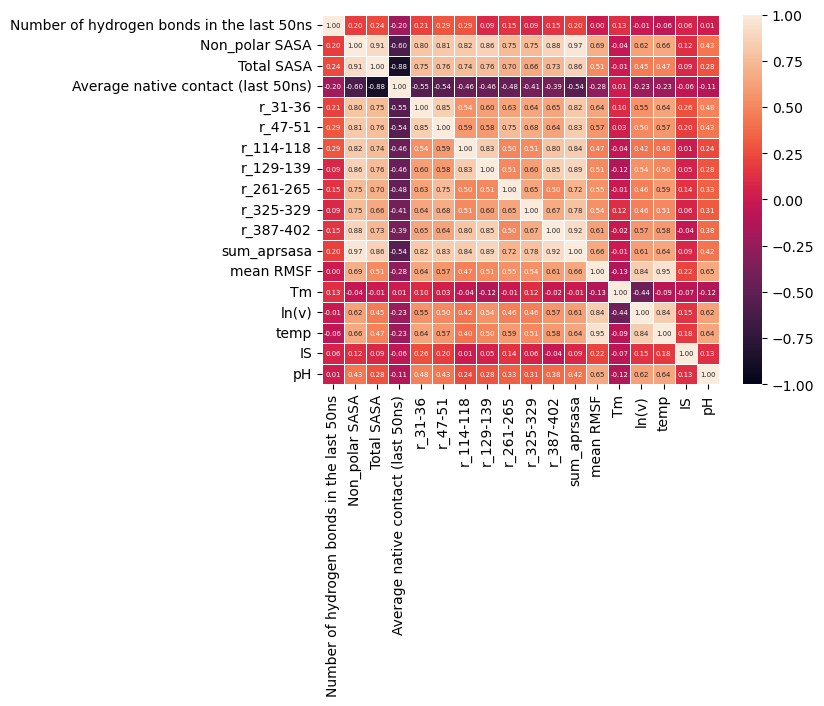

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = mean_rmsf_nc_sasa_agg_total_sasa_hbond

# Set column 'Number' as the index
df.set_index('Number', inplace=True)

df = df.drop(['Condition'],axis = 1)

# To find the correlation among
# the columns using pearson method
df_correlation = df.corr(method ='pearson')

# save the pearson correlation to an excel
#df_correlation.to_excel("PearsonCorrelationMatrixPandas071123.xlsx")


# plot a heatmap
sns.heatmap(df_correlation, annot=True, annot_kws={"fontsize":5}, fmt=".2f",linewidth=.5, vmin = -1, vmax = 1)


### Old version, nc - salt bridge fraction

###### Read the files

In [28]:
import pandas as pd

# Read mean_rmsf_nc_sasa_agg_total_sasa_temp311023.
## note, this file was generated in section 6 since this section was added after section 6

mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp311023.xlsx",index_col=1)

# drop the first column
mean_rmsf_nc_sasa_agg_total_sasa = mean_rmsf_nc_sasa_agg_total_sasa.drop(mean_rmsf_nc_sasa_agg_total_sasa.columns[0],axis=1)


# read Hbonds

hbond = pd.read_excel("AvgHbondsNumberLast50ns.xlsx", index_col=1)

# drop the first column
hbond = hbond.drop(hbond.columns[0],axis=1)

# join the dataframes
mean_rmsf_nc_sasa_agg_total_sasa_hbond = pd.concat([hbond,mean_rmsf_nc_sasa_agg_total_sasa],axis=1,join='inner')


# save the dataframe into an excel file
#mean_rmsf_nc_sasa_agg_total_sasa_hbond.to_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx")

In [29]:
mean_rmsf_nc_sasa_agg_total_sasa_hbond

,Number of hydrogen bonds in the last 50ns,Non_polar SASA,Total SASA,Average native contact (last 50ns),r_31-36,r_47-51,r_114-118,r_129-139,r_261-265,r_325-329,r_387-402,sum_aprsasa,mean RMSF,Tm,ln(v),Number,temp,IS,pH
Condition,,,,,,,,,,,,,,,,,,,
3_5_277_0,299.118000,228.906489,289.970744,0.213763,0.372220,0.023772,0.248029,0.184549,-0.106773,0.074636,0.584502,1.380934,0.137486,73.701367,-5.945103,1,277,0,7.0
8_338_0,302.783667,243.092681,304.607920,0.232773,0.705146,0.574838,0.322555,0.146747,0.584262,0.538368,0.215657,3.087574,0.178100,77.892600,1.616794,2,338,0,8.0
3_5_338_100,301.456667,248.056974,310.778369,0.226088,0.613732,0.438593,0.867235,1.049615,0.087918,0.135492,1.691235,4.883820,0.178747,62.479633,9.005473,3,338,100,8.0
3_5_338_200,298.362333,254.137026,316.393640,0.255331,1.129000,0.583300,0.484156,0.852628,0.649509,0.559015,1.466892,5.724500,0.190311,60.646233,9.639418,4,338,200,8.0
5_5_296_250,301.627667,233.396841,296.123944,0.205929,0.284520,0.088570,0.077634,0.488544,0.266072,0.176160,0.309203,1.690703,0.138876,80.722867,-3.761981,5,296,250,5.5
9_338_200,301.846667,248.530223,311.459850,0.212496,1.047581,0.471270,0.245948,0.763151,0.281167,0.409509,1.124270,4.342896,0.166817,77.352967,2.465767,6,338,200,8.0
318K_7_250M,302.444667,241.492613,303.246299,0.234856,0.729646,0.450002,0.285218,0.210840,0.305323,0.266757,0.501578,2.749363,0.164697,77.927800,-2.707400,7,318,250,7.0
3_5_277_50,301.537333,225.952698,287.291211,0.208226,0.373968,0.244099,0.102368,0.128406,0.101589,-0.050058,0.063959,0.964329,0.131624,64.945700,-4.382091,8,277,50,7.0
296K_7_50M,302.171333,227.558598,289.385838,0.203910,0.150209,0.082233,0.106338,-0.214087,0.246922,0.080754,-0.174400,0.277970,0.146066,77.966100,-4.651000,9,296,50,7.0


<Axes: >

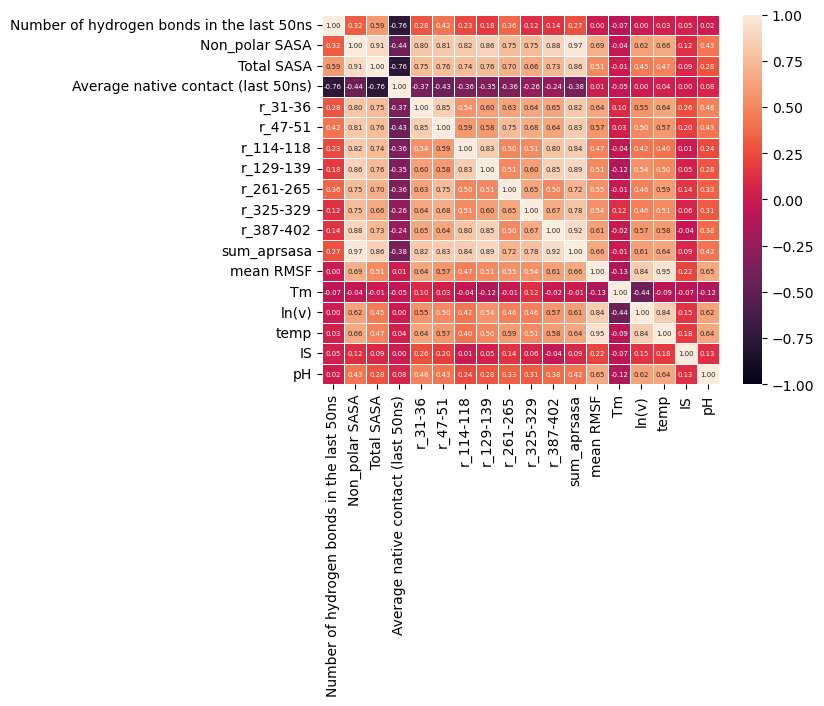

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = mean_rmsf_nc_sasa_agg_total_sasa_hbond

# Set column 'Number' as the index
df.set_index('Number', inplace=True)

# if the column has a condition, delete it
try:
    df = df.drop(['Condition'],axis = 1)
    
except Exception:
    pass


# To find the correlation among
# the columns using pearson method
df_correlation = df.corr(method ='pearson')

# save the pearson correlation to an excel
#df_correlation.to_excel("PearsonCorrelationMatrixPandas011123.xlsx")


# plot a heatmap
sns.heatmap(df_correlation, annot=True, annot_kws={"fontsize":5}, fmt=".2f",linewidth=.5, vmin = -1, vmax = 1)


# Analysis copying idea from papers - updated 061123

### Paper: Machine Learning Applied to Determine the Molecular Descriptors Responsible for the Viscosity Behavior of Concentrated Therapeutic Antibodies - Ping-kuang Lai, Bernard Trout

Paper: 

https://pubs.acs.org/doi/full/10.1021/acs.molpharmaceut.0c01073 




In [2]:
import pandas as pd

# Read the dataframe 

mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa061123.xlsx")

# Give name to the first column
mean_rmsf_nc_sasa_agg_total_sasa.columns.values[0] = 'Condition'

# Add a new column 'RowNumber' with row count starting from 1
mean_rmsf_nc_sasa_agg_total_sasa['Number'] = mean_rmsf_nc_sasa_agg_total_sasa.reset_index().index + 1

# Save the dataframe to an excel 
#mean_rmsf_nc_sasa_agg_total_sasa.to_excel("mean_rmsf_nc_sasa_agg_total_sasa_number061123.xlsx")

#### A bar chart of the aggregation rates of the 49 conditions

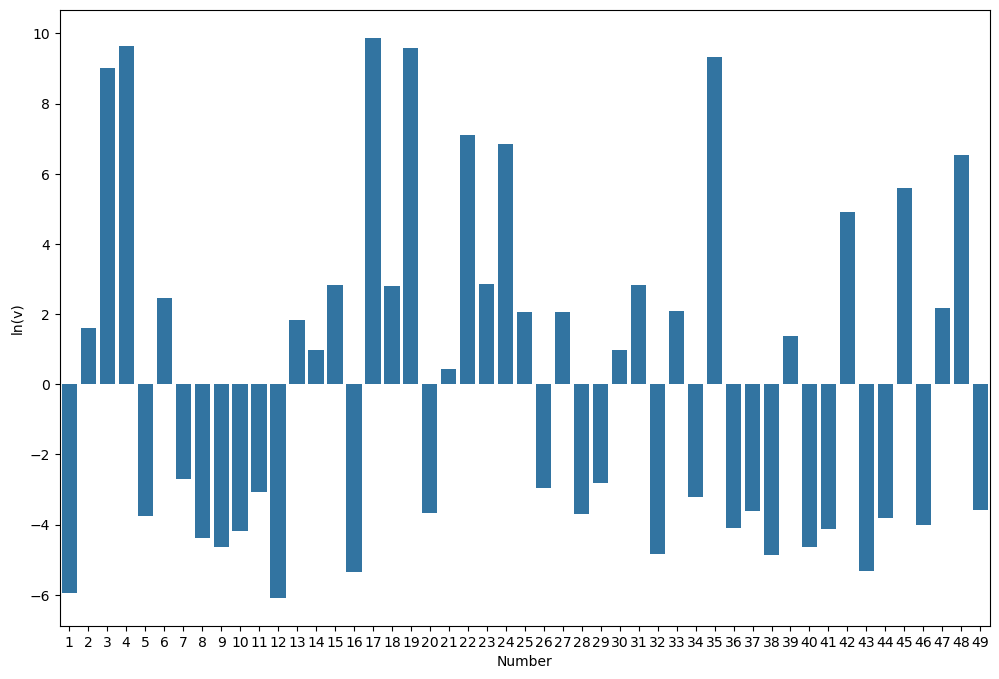

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_number061123.xlsx",index_col=0)

# Set the size of the plot
plt.figure(figsize=(12, 8))

sns.barplot(mean_rmsf_nc_sasa_agg_total_sasa, x="Number", y="ln(v)")

# Show the plot
plt.show()

#### A scatter plot of sum_aprsasa vs ln(v)

###### Add temp, IS, pH columns into the dataframe

In [74]:
i = '_0'
a = int(i.strip("_"))
a

0

In [6]:
# define a function to assign temp, IS, pH columns into a pandas dataframe

## update 19/11/23
## r'^7_|_7_' the ^ is needed otherwise it will get the 7 in 277 


import pandas as pd
import re

def assign_conditions(df):
    temp_values = ['277', '296', '318', '338']
    IS_values = ['_0', '50', '100', '150', '200', '250', '300', '400', '500']

    df['temp'] = None
    df['IS'] = None
    df['pH'] = None

    for i in temp_values:
        for index, row in df.iterrows():
            condition = row['Condition']
            if re.search(i, condition):
                df.loc[index, 'temp'] = i

    for i in IS_values:
        for index, row in df.iterrows():
            condition = row['Condition']
            if re.search(i, condition):
                df.loc[index, 'IS'] = int(i.strip("_"))

    for index, row in df.iterrows():
        condition = row['Condition']
        if re.search(r'^7_|_7_', condition):
            df.loc[index, 'pH'] = 7
        elif re.search(r'^8_|_8_', condition):
            df.loc[index, 'pH'] = 8
        elif re.search(r'^9_|_9_', condition):
            df.loc[index, 'pH'] = 9
        elif re.search(r'3_5', condition):
            df.loc[index, 'pH'] = 3.5
        elif re.search(r'4_5', condition):
            df.loc[index, 'pH'] = 4.5
        elif re.search(r'5_5', condition):
            df.loc[index, 'pH'] = 5.5

            
# Usage
# mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_number061123.xlsx", index_col=0)
# assign_conditions(mean_rmsf_nc_sasa_agg_total_sasa)

In [11]:
# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx")

# assign pH, temp, IS columns into the dataframe
assign_conditions(mean_rmsf_nc_sasa_agg_total_sasa)

# Save dataframe into an excel            
#mean_rmsf_nc_sasa_agg_total_sasa.to_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx")

##### temperature

In [26]:
import pandas as pd

mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx",index_col=0)

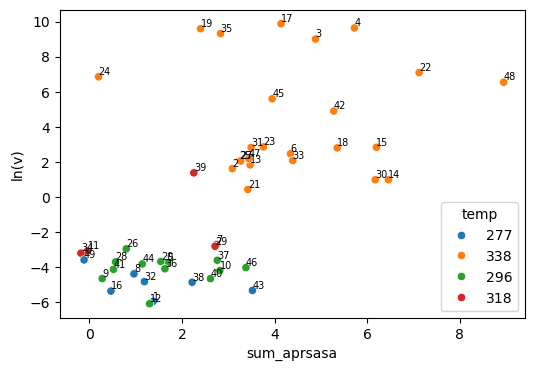

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set the size of the plot
plt.figure(figsize=(6, 4))

sns.scatterplot(mean_rmsf_nc_sasa_agg_total_sasa, x="sum_aprsasa", y="ln(v)",hue = 'temp')

# Annotate each point with its label
for i, row in mean_rmsf_nc_sasa_agg_total_sasa.iterrows():
    plt.text(row['sum_aprsasa'], row['ln(v)'], row['Number'], fontsize=7, ha='left', va='bottom')


# Show the plot
plt.show()

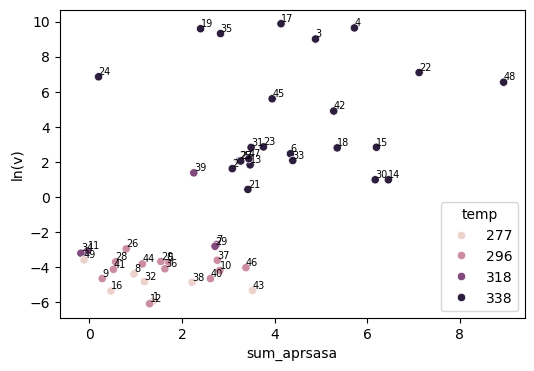

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set the size of the plot
plt.figure(figsize=(6, 4))

sns.scatterplot(mean_rmsf_nc_sasa_agg_total_sasa, x="sum_aprsasa", y="ln(v)",hue = 'temp')

# Annotate each point with its label
for i, row in mean_rmsf_nc_sasa_agg_total_sasa.iterrows():
    plt.text(row['sum_aprsasa'], row['ln(v)'], row['Number'], fontsize=7, ha='left', va='bottom')


# Show the plot
plt.show()

##### pH

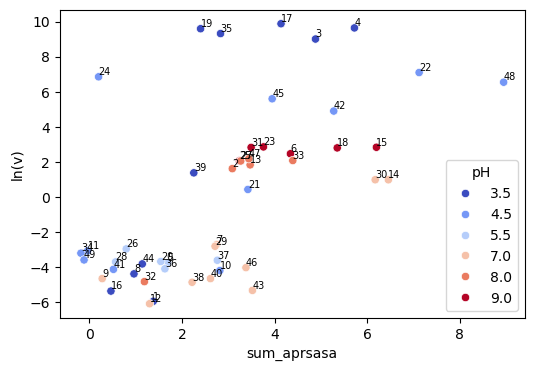

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx", index_col=0)


# Set the size of the plot
plt.figure(figsize=(6, 4))

sns.scatterplot(data = mean_rmsf_nc_sasa_agg_total_sasa, x="sum_aprsasa", y="ln(v)",hue = 'pH',palette='coolwarm')

# Annotate each point with its label
for i, row in mean_rmsf_nc_sasa_agg_total_sasa.iterrows():
    plt.text(row['sum_aprsasa'], row['ln(v)'], row['Number'], fontsize=7, ha='left', va='bottom')

    

# Show the plot
plt.show()

##### IS

In [33]:
mean_rmsf_nc_sasa_agg_total_sasa

,Condition,Number of hydrogen bonds in the last 50ns,Non_polar SASA,Total SASA,Average native contact (last 50ns),r_31-36,r_47-51,r_114-118,r_129-139,r_261-265,r_325-329,r_387-402,sum_aprsasa,mean RMSF,Tm,ln(v),Number,temp,IS,pH
0,3_5_277_0,299.118000,228.906489,289.970744,0.213763,0.372220,0.023772,0.248029,0.184549,-0.106773,0.074636,0.584502,1.380934,0.137486,73.701367,-5.945103,1,277,0,3.5
1,8_338_0,302.783667,243.092681,304.607920,0.232773,0.705146,0.574838,0.322555,0.146747,0.584262,0.538368,0.215657,3.087574,0.178100,77.892600,1.616794,2,338,0,8.0
2,3_5_338_100,301.456667,248.056974,310.778369,0.226088,0.613732,0.438593,0.867235,1.049615,0.087918,0.135492,1.691235,4.883820,0.178747,62.479633,9.005473,3,338,100,3.5
3,3_5_338_200,298.362333,254.137026,316.393640,0.255331,1.129000,0.583300,0.484156,0.852628,0.649509,0.559015,1.466892,5.724500,0.190311,60.646233,9.639418,4,338,200,3.5
4,5_5_296_250,301.627667,233.396841,296.123944,0.205929,0.284520,0.088570,0.077634,0.488544,0.266072,0.176160,0.309203,1.690703,0.138876,80.722867,-3.761981,5,296,250,5.5
5,9_338_200,301.846667,248.530223,311.459850,0.212496,1.047581,0.471270,0.245948,0.763151,0.281167,0.409509,1.124270,4.342896,0.166817,77.352967,2.465767,6,338,200,9.0
6,318K_7_250M,302.444667,241.492613,303.246299,0.234856,0.729646,0.450002,0.285218,0.210840,0.305323,0.266757,0.501578,2.749363,0.164697,77.927800,-2.707400,7,318,250,7.0
7,3_5_277_50,301.537333,225.952698,287.291211,0.208226,0.373968,0.244099,0.102368,0.128406,0.101589,-0.050058,0.063959,0.964329,0.131624,64.945700,-4.382091,8,277,50,3.5
8,296K_7_50M,302.171333,227.558598,289.385838,0.203910,0.150209,0.082233,0.106338,-0.214087,0.246922,0.080754,-0.174400,0.277970,0.146066,77.966100,-4.651000,9,296,50,7.0
9,4_5_296_250,298.405000,241.771463,304.251571,0.222016,0.661202,0.293401,0.436353,0.503143,0.339889,0.385584,0.198846,2.818418,0.150951,73.072733,-4.193857,10,296,250,4.5


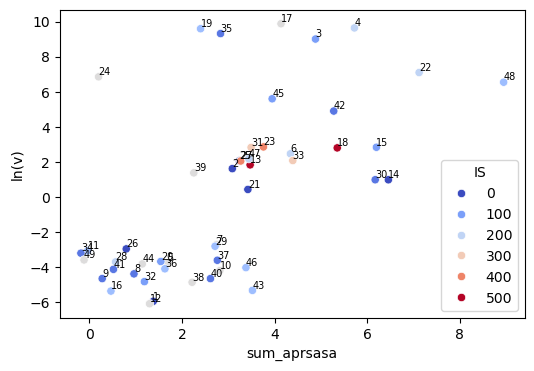

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set the size of the plot
plt.figure(figsize=(6, 4))

sns.scatterplot(data = mean_rmsf_nc_sasa_agg_total_sasa, x="sum_aprsasa", y="ln(v)",hue = 'IS',palette='coolwarm')

# Annotate each point with its label
for i, row in mean_rmsf_nc_sasa_agg_total_sasa.iterrows():
    plt.text(row['sum_aprsasa'], row['ln(v)'], row['Number'], fontsize=7, ha='left', va='bottom')

    

# Show the plot
plt.show()

Hmmm this plot does not have IS 150, 250, 50. Why?

#### A scatter plot of native contacts vs ln(v) 

##### Updated version

##### temperature

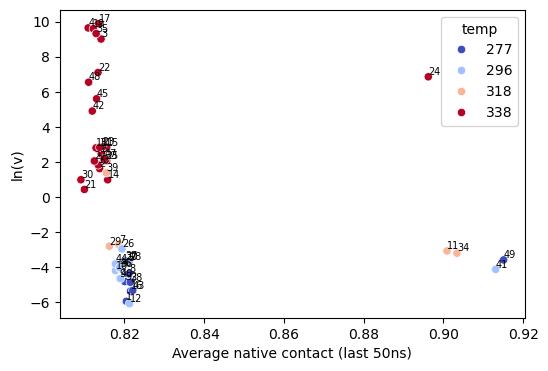

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp061123.xlsx",index_col=0)

# Set the size of the plot
plt.figure(figsize=(6, 4))

sns.scatterplot(mean_rmsf_nc_sasa_agg_total_sasa, x="Average native contact (last 50ns)", y="ln(v)",hue = 'temp',palette='coolwarm')

# Annotate each point with its label
for i, row in mean_rmsf_nc_sasa_agg_total_sasa.iterrows():
    plt.text(row['Average native contact (last 50ns)'], row['ln(v)'], row['Number'], fontsize=7, ha='left', va='bottom')

    
# Show the plot
plt.show()

##### pH

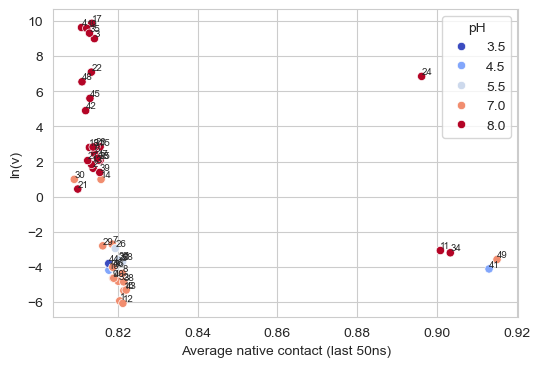

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx",index_col=0)

# Set the size of the plot
plt.figure(figsize=(6, 4))

sns.scatterplot(mean_rmsf_nc_sasa_agg_total_sasa, x="Average native contact (last 50ns)", y="ln(v)",hue = 'pH',palette='coolwarm')

# Annotate each point with its label
for i, row in mean_rmsf_nc_sasa_agg_total_sasa.iterrows():
    plt.text(row['Average native contact (last 50ns)'], row['ln(v)'], row['Number'], fontsize=7, ha='left', va='bottom')

    
# Show the plot
plt.show()

##### IS

###### update 19/11/23 - i was thinking maybe seaborn has a recent update so sns.scatterplot(data = mean_rmsf_nc_sasa_agg_total_sasa you have to use data = 

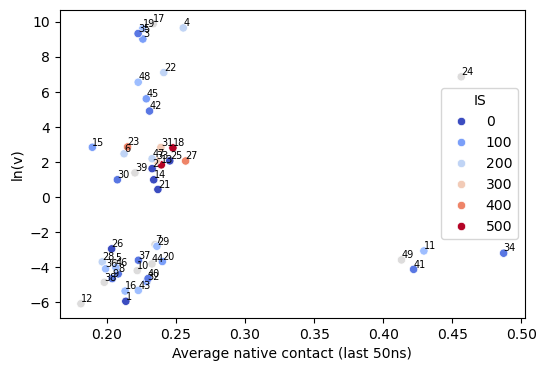

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx",index_col=0)


# Set the size of the plot
plt.figure(figsize=(6, 4))

sns.scatterplot(data =mean_rmsf_nc_sasa_agg_total_sasa, x="Average native contact (last 50ns)", y="ln(v)",hue = 'IS',palette='coolwarm')

# Annotate each point with its label
for i, row in mean_rmsf_nc_sasa_agg_total_sasa.iterrows():
    plt.text(row['Average native contact (last 50ns)'], row['ln(v)'], row['Number'], fontsize=7, ha='left', va='bottom')

    
# Show the plot
plt.show()

##### Older version

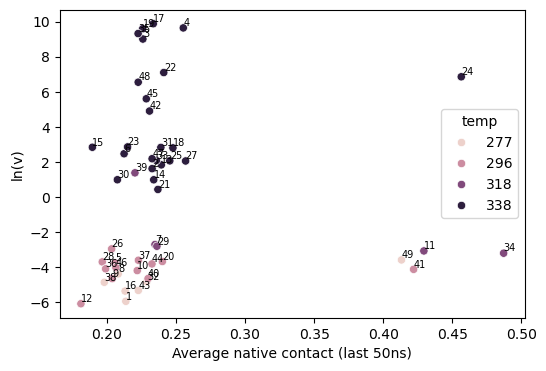

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp311023.xlsx",index_col=0)

# Set the size of the plot
plt.figure(figsize=(6, 4))

sns.scatterplot(mean_rmsf_nc_sasa_agg_total_sasa, x="Average native contact (last 50ns)", y="ln(v)",hue = 'temp')

# Annotate each point with its label
for i, row in mean_rmsf_nc_sasa_agg_total_sasa.iterrows():
    plt.text(row['Average native contact (last 50ns)'], row['ln(v)'], row['Number'], fontsize=7, ha='left', va='bottom')

    
# Show the plot
plt.show()

#### A scatter plot of the mean RMSF vs ln(v)

##### temperature

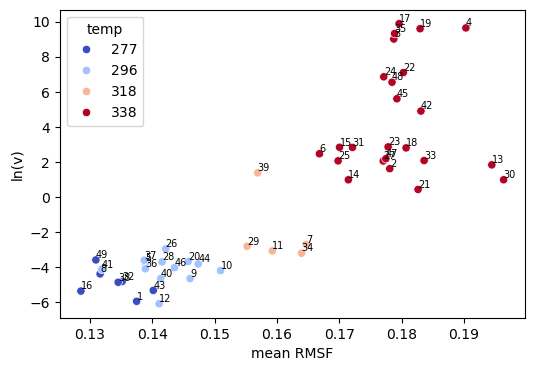

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx",index_col=0)

# Set the size of the plot
plt.figure(figsize=(6, 4))

sns.scatterplot(mean_rmsf_nc_sasa_agg_total_sasa, x="mean RMSF", y="ln(v)",hue = 'temp',palette='coolwarm')

# Annotate each point with its label
for i, row in mean_rmsf_nc_sasa_agg_total_sasa.iterrows():
    plt.text(row['mean RMSF'], row['ln(v)'], row['Number'], fontsize=7, ha='left', va='bottom')

    
# Show the plot
plt.show()

##### pH

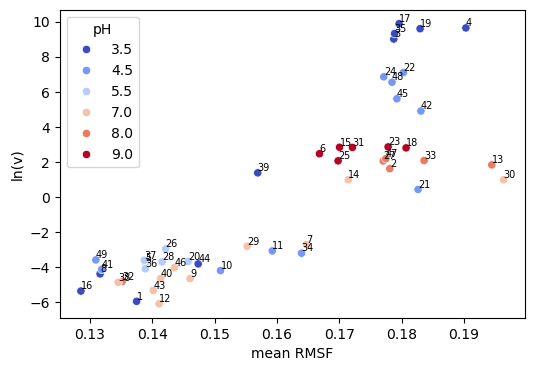

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx",index_col=0)

# Set the size of the plot
plt.figure(figsize=(6, 4))

sns.scatterplot(data = mean_rmsf_nc_sasa_agg_total_sasa, x="mean RMSF", y="ln(v)",hue = 'pH',palette='coolwarm')

# Annotate each point with its label
for i, row in mean_rmsf_nc_sasa_agg_total_sasa.iterrows():
    plt.text(row['mean RMSF'], row['ln(v)'], row['Number'], fontsize=7, ha='left', va='bottom')

    
# Show the plot
plt.show()

#### A scatter plot of non-polar SASA vs lnv

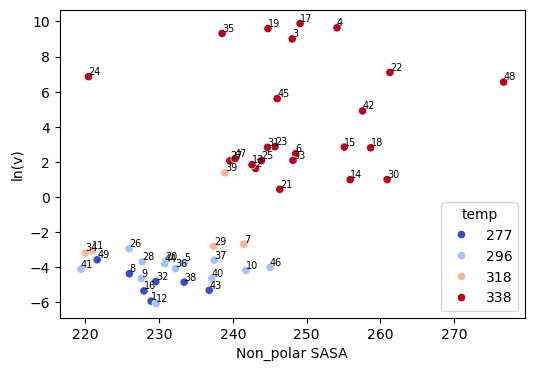

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp061123.xlsx", index_col=0)

# Set the size of the plot
plt.figure(figsize=(6, 4))

# Specify a different color palette, e.g., "viridis"
sns.scatterplot(data=mean_rmsf_nc_sasa_agg_total_sasa, x="Non_polar SASA", y="ln(v)", hue='temp', palette='coolwarm')

# Annotate each point with its label
for i, row in mean_rmsf_nc_sasa_agg_total_sasa.iterrows():
    plt.text(row['Non_polar SASA'], row['ln(v)'], row['Number'], fontsize=7, ha='left', va='bottom')

# Show the plot
plt.show()


##### pH

###### Updated 19/11/23

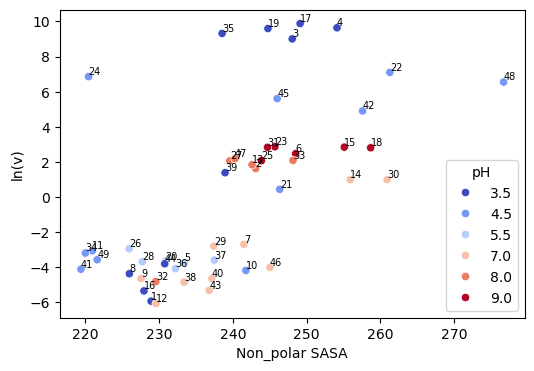

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx", index_col=0)

# Set the size of the plot
plt.figure(figsize=(6, 4))

# Specify a different color palette, e.g., "viridis"
sns.scatterplot(data=mean_rmsf_nc_sasa_agg_total_sasa, x="Non_polar SASA", y="ln(v)", hue='pH', palette='coolwarm')

# Annotate each point with its label
for i, row in mean_rmsf_nc_sasa_agg_total_sasa.iterrows():
    plt.text(row['Non_polar SASA'], row['ln(v)'], row['Number'], fontsize=7, ha='left', va='bottom')

# Show the plot
plt.show()


##### Older version

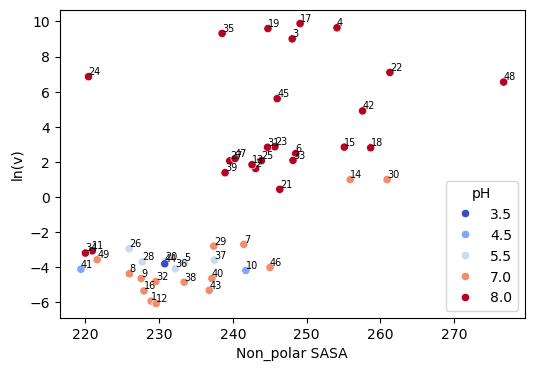

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp061123.xlsx", index_col=0)

# Set the size of the plot
plt.figure(figsize=(6, 4))

# Specify a different color palette, e.g., "viridis"
sns.scatterplot(data=mean_rmsf_nc_sasa_agg_total_sasa, x="Non_polar SASA", y="ln(v)", hue='pH', palette='coolwarm')

# Annotate each point with its label
for i, row in mean_rmsf_nc_sasa_agg_total_sasa.iterrows():
    plt.text(row['Non_polar SASA'], row['ln(v)'], row['Number'], fontsize=7, ha='left', va='bottom')

# Show the plot
plt.show()


#### A scatter plot of lnv vs Tm

### Paper: A single molecular descriptor to predict solution behavior of therapeutic antibodies - Jonathan S. Kingsbury

https://www.science.org/doi/full/10.1126/sciadv.abb0372 

#### Spearman rank correlation

##### sum_aprsasa vs ln(v) - updated 061123

In [24]:
import pandas as pd
from scipy.stats import spearmanr

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp061123.xlsx",index_col=0)

df = mean_rmsf_nc_sasa_agg_total_sasa

# Set column 'Number' as the index
df.set_index('Number', inplace=True)

# Calculate Spearman rank correlation
correlation, p_value = spearmanr(df['sum_aprsasa'], df['ln(v)'])


# # Display rank order output for the entire DataFrame
# rank_order_df = mean_rmsf_nc_sasa_agg_total_sasa.rank()
# display(rank_order_df)

# Display Spearman rank correlation
print(f"\nSpearman Rank Correlation: {correlation}")
print(f"P-value: {p_value}")


Spearman Rank Correlation: 0.6183673469387755
P-value: 2.192730653769521e-06


In [25]:
rank_order_df = mean_rmsf_nc_sasa_agg_total_sasa.rank()
rank_order_df

,Condition,Non_polar SASA,Total SASA,Average native contact (last 50ns),r_31-36,r_47-51,r_114-118,r_129-139,r_261-265,r_325-329,r_387-402,sum_aprsasa,mean RMSF,Tm,ln(v),temp,IS,pH
Number,,,,,,,,,,,,,,,,,,
1,16.00,11.00,11.00,37.00,10.00,9.00,23.00,15.00,4.00,14.00,28.00,14.00,7.00,16.00,2.00,4.00,3.50,17.00
2,39.00,30.00,29.00,14.00,28.00,42.00,30.00,10.00,44.00,42.00,16.00,27.00,35.00,31.00,29.00,37.50,3.50,37.00
3,18.00,38.00,38.00,16.00,22.00,34.00,47.00,44.00,11.00,17.00,45.00,41.00,37.00,7.00,45.00,37.50,18.00,37.00
4,20.00,42.00,42.00,3.00,45.00,43.00,39.00,41.00,47.00,43.00,44.00,44.00,47.00,4.00,48.00,37.50,31.00,37.00
5,32.00,18.00,18.00,38.00,9.00,11.00,10.00,28.00,27.00,20.00,22.00,17.00,9.00,47.00,15.00,14.00,38.50,6.50
6,46.00,40.00,40.00,17.00,44.00,37.00,22.00,38.00,29.00,32.00,39.00,39.00,26.00,29.00,35.00,37.50,31.00,37.00
7,9.00,27.00,27.00,28.00,29.00,36.00,26.00,16.00,30.00,24.00,25.00,23.00,25.00,33.50,24.00,23.00,38.50,17.00
8,17.00,7.00,7.00,39.00,11.00,22.00,12.00,8.00,12.00,2.00,8.00,10.00,3.00,8.50,9.00,4.00,11.00,17.00
9,5.00,8.00,10.00,30.00,4.00,10.00,14.00,3.00,24.00,15.00,2.00,5.00,18.00,37.50,8.00,14.00,11.00,17.00


##### A more broadly used tool with pingoouin - spearman test - updated 061123

In [22]:
import pandas as pd
import pingouin as pg

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp061123.xlsx",index_col=0)

df = mean_rmsf_nc_sasa_agg_total_sasa

# Set column 'Number' as the index
df.set_index('Number', inplace=True)


# Calculate Spearman rank correlation
result = pg.pairwise_corr(df, method='spearman')

# Save the result to an excel file
#result.to_excel("SpearmanRankCorrelationAllVariables011123.xlsx")

###### pandas

<Axes: >

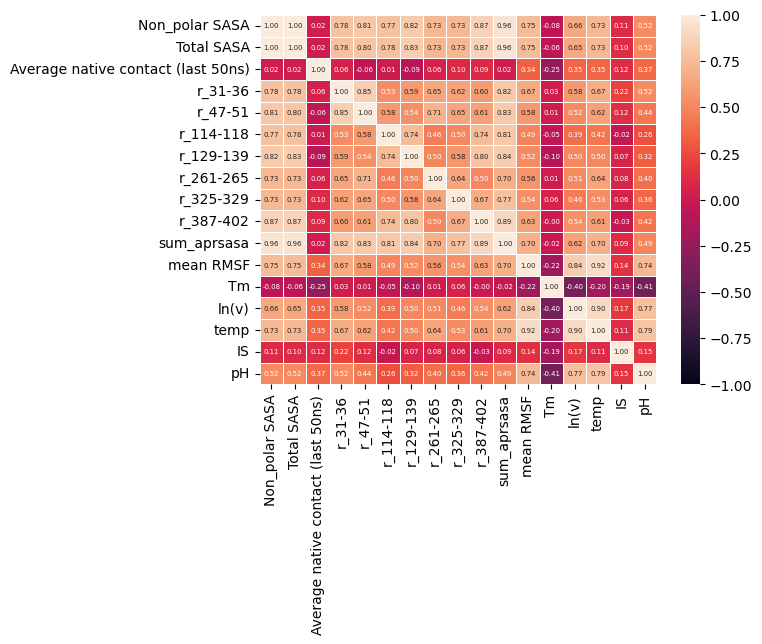

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp311023.xlsx",index_col=0)

df = mean_rmsf_nc_sasa_agg_total_sasa

# Set column 'Number' as the index
df.set_index('Number', inplace=True)

df = df.drop(['Condition'],axis = 1)

# To find the correlation among
# the columns using pearson method
df_correlation = df.corr(method ='spearman')


# plot a heatmap
sns.heatmap(df_correlation, annot=True, annot_kws={"fontsize":5}, fmt=".2f",linewidth=.5,vmin = -1,vmax = 1)


##### update 15/11/23 include HBonds

<Axes: >

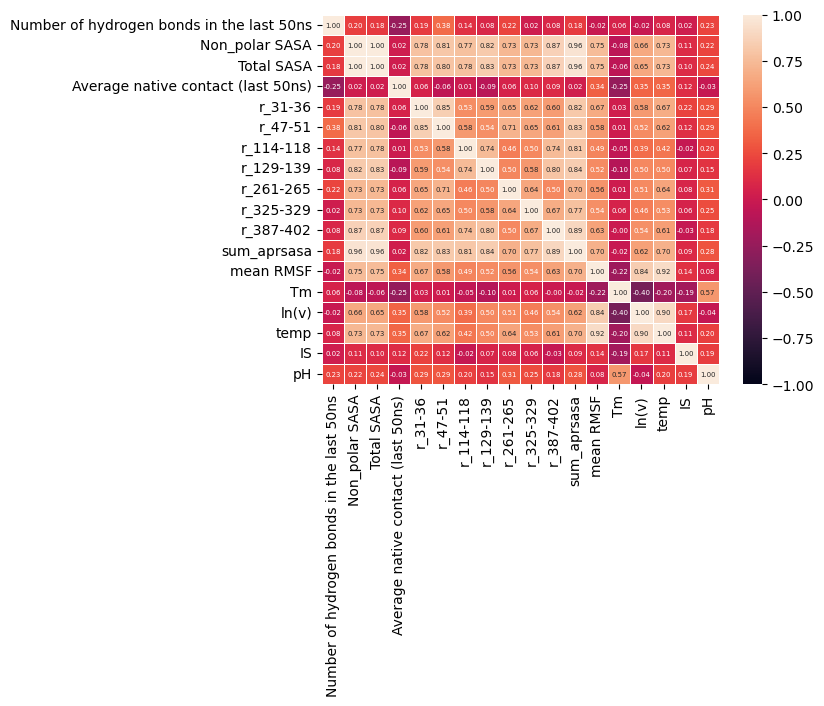

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa_hbond = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx",index_col=0)

df = mean_rmsf_nc_sasa_agg_total_sasa_hbond

# Set column 'Number' as the index
df.set_index('Number', inplace=True)

# if the column has a condition, delete it
try:
    df = df.drop(['Condition'],axis = 1)
    
except Exception:
    pass

# To find the correlation among
# the columns using pearson method
df_correlation = df.corr(method ='spearman')


# plot a heatmap
sns.heatmap(df_correlation, annot=True, annot_kws={"fontsize":5}, fmt=".2f",linewidth=.5,vmin = -1,vmax = 1)


In [45]:
mean_rmsf_nc_sasa_agg_total_sasa_hbond.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 3_5_277_0 to 277_4_5_250M
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Number of hydrogen bonds in the last 50ns  49 non-null     float64
 1   Non_polar SASA                             49 non-null     float64
 2   Total SASA                                 49 non-null     float64
 3   Average native contact (last 50ns)         49 non-null     float64
 4   r_31-36                                    49 non-null     float64
 5   r_47-51                                    49 non-null     float64
 6   r_114-118                                  49 non-null     float64
 7   r_129-139                                  49 non-null     float64
 8   r_261-265                                  49 non-null     float64
 9   r_325-329                                  49 non-null     float64
 10  r_387-402      

#### Pearson test

##### Try pearson test

In [19]:
import pandas as pd
import pingouin as pg

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp311023.xlsx",index_col=0)

df = mean_rmsf_nc_sasa_agg_total_sasa

# Set column 'Number' as the index
df.set_index('Number', inplace=True)


# Calculate Spearman rank correlation
pearson = pg.pairwise_corr(df, method='pearson')

# Save the result to an excel file
#pearson.to_excel("PearsonCorrelationAllVariables011123.xlsx")

##### A matrix version of pearson test

In [63]:
mean_rmsf_nc_sasa_agg_total_sasa

,Condition,Non_polar SASA,Total SASA,Average native contact (last 50ns),r_31-36,r_47-51,r_114-118,r_129-139,r_261-265,r_325-329,r_387-402,sum_aprsasa,mean RMSF,Tm,ln(v),temp,IS,pH
Number,,,,,,,,,,,,,,,,,,
1,3_5_277_0,228.906489,289.970744,0.213763,0.372220,0.023772,0.248029,0.184549,-0.106773,0.074636,0.584502,1.380934,0.137486,73.701367,-5.945103,277,_0,3.5
2,8_338_0,243.092681,304.607920,0.232773,0.705146,0.574838,0.322555,0.146747,0.584262,0.538368,0.215657,3.087574,0.178100,77.892600,1.616794,338,_0,8.0
3,3_5_338_100,248.056974,310.778369,0.226088,0.613732,0.438593,0.867235,1.049615,0.087918,0.135492,1.691235,4.883820,0.178747,62.479633,9.005473,338,100,3.5
4,3_5_338_200,254.137026,316.393640,0.255331,1.129000,0.583300,0.484156,0.852628,0.649509,0.559015,1.466892,5.724500,0.190311,60.646233,9.639418,338,200,3.5
5,5_5_296_250,233.396841,296.123944,0.205929,0.284520,0.088570,0.077634,0.488544,0.266072,0.176160,0.309203,1.690703,0.138876,80.722867,-3.761981,296,250,5.5
6,9_338_200,248.530223,311.459850,0.212496,1.047581,0.471270,0.245948,0.763151,0.281167,0.409509,1.124270,4.342896,0.166817,77.352967,2.465767,338,200,9.0
7,318K_7_250M,241.492613,303.246299,0.234856,0.729646,0.450002,0.285218,0.210840,0.305323,0.266757,0.501578,2.749363,0.164697,77.927800,-2.707400,318,250,7.0
8,3_5_277_50,225.952698,287.291211,0.208226,0.373968,0.244099,0.102368,0.128406,0.101589,-0.050058,0.063959,0.964329,0.131624,64.945700,-4.382091,277,50,3.5
9,296K_7_50M,227.558598,289.385838,0.203910,0.150209,0.082233,0.106338,-0.214087,0.246922,0.080754,-0.174400,0.277970,0.146066,77.966100,-4.651000,296,50,7.0


In [90]:
import pandas as pd
import pingouin as pg

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp311023.xlsx",index_col=0)

df = mean_rmsf_nc_sasa_agg_total_sasa

# Set column 'Number' as the index
df.set_index('Number', inplace=True)

df = df.drop(['Condition'],axis = 1)


# Calculate Spearman rank correlation
pearson = df.rcorr(method='pearson')

# Save the result to an excel file
#pearson.to_csv("PearsonMatrixAllVariables011123.csv")

In [80]:
pearson

,Non_polar SASA,Total SASA,Average native contact (last 50ns),r_31-36,r_47-51,r_114-118,r_129-139,r_261-265,r_325-329,r_387-402,sum_aprsasa,mean RMSF,Tm,ln(v),temp,IS,pH
Non_polar SASA,-,***,**,***,***,***,***,***,***,***,***,***,,***,***,,**
Total SASA,0.908,-,***,***,***,***,***,***,***,***,***,***,,**,***,,
Average native contact (last 50ns),-0.438,-0.76,-,**,**,*,*,*,,,**,,,,,,
r_31-36,0.8,0.748,-0.371,-,***,***,***,***,***,***,***,***,,***,***,,***
r_47-51,0.815,0.764,-0.432,0.847,-,***,***,***,***,***,***,***,,***,***,,**
r_114-118,0.824,0.744,-0.363,0.544,0.586,-,***,***,***,***,***,***,,**,**,,
r_129-139,0.864,0.757,-0.351,0.604,0.579,0.833,-,***,***,***,***,***,,***,***,,*
r_261-265,0.746,0.695,-0.358,0.633,0.754,0.496,0.505,-,***,***,***,***,,***,***,,*
r_325-329,0.746,0.657,-0.261,0.644,0.675,0.513,0.603,0.648,-,***,***,***,,***,***,,*
r_387-402,0.88,0.731,-0.238,0.648,0.636,0.796,0.846,0.503,0.67,-,***,***,,***,***,,**


##### Pandas corr() function

##### Updated updated version 19/11/23

<Axes: >

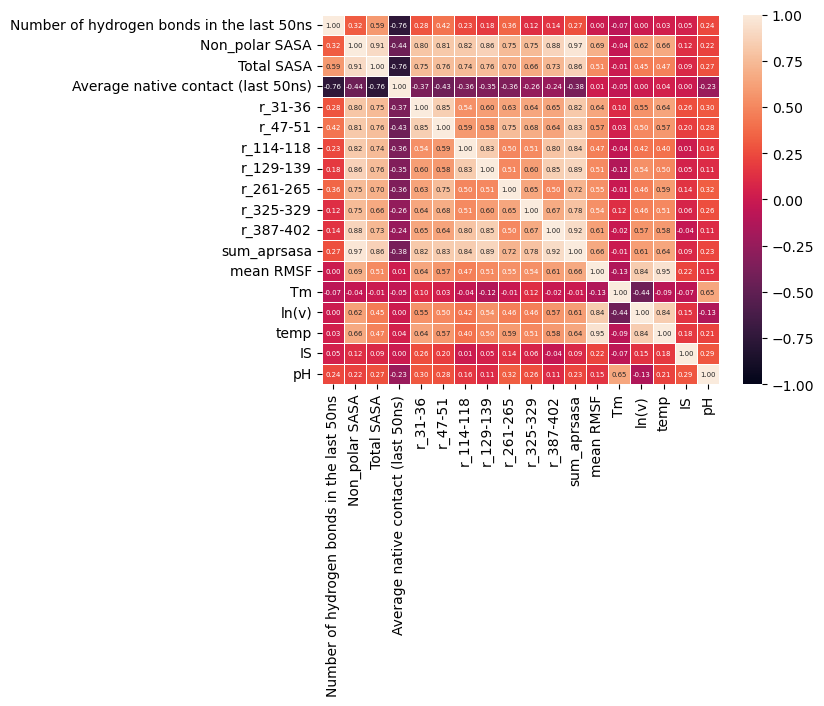

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx",index_col=0)

df = mean_rmsf_nc_sasa_agg_total_sasa

# Set column 'Number' as the index
df.set_index('Number', inplace=True)

df = df.drop(['Condition'],axis = 1)

# To find the correlation among
# the columns using pearson method
df_correlation = df.corr(method ='pearson')

# save the pearson correlation to an excel
#df_correlation.to_excel("PearsonCorrelationMatrixPandas011123.xlsx")


# plot a heatmap
sns.heatmap(df_correlation, annot=True, annot_kws={"fontsize":5}, fmt=".2f",linewidth=.5, vmin = -1, vmax = 1)


##### Updated version

<Axes: >

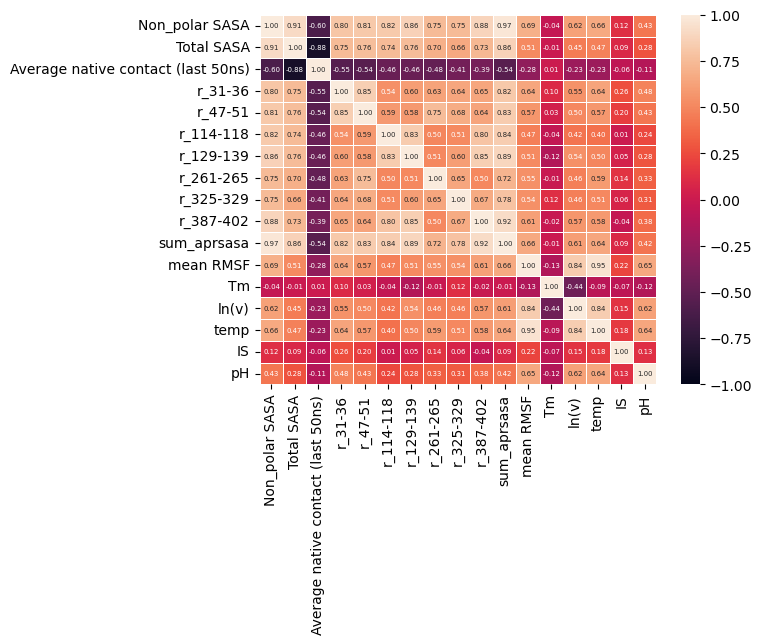

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp061123.xlsx",index_col=0)

df = mean_rmsf_nc_sasa_agg_total_sasa

# Set column 'Number' as the index
df.set_index('Number', inplace=True)

df = df.drop(['Condition'],axis = 1)

# To find the correlation among
# the columns using pearson method
df_correlation = df.corr(method ='pearson')

# save the pearson correlation to an excel
#df_correlation.to_excel("PearsonCorrelationMatrixPandas011123.xlsx")


# plot a heatmap
sns.heatmap(df_correlation, annot=True, annot_kws={"fontsize":5}, fmt=".2f",linewidth=.5, vmin = -1, vmax = 1)


##### older version

<Axes: >

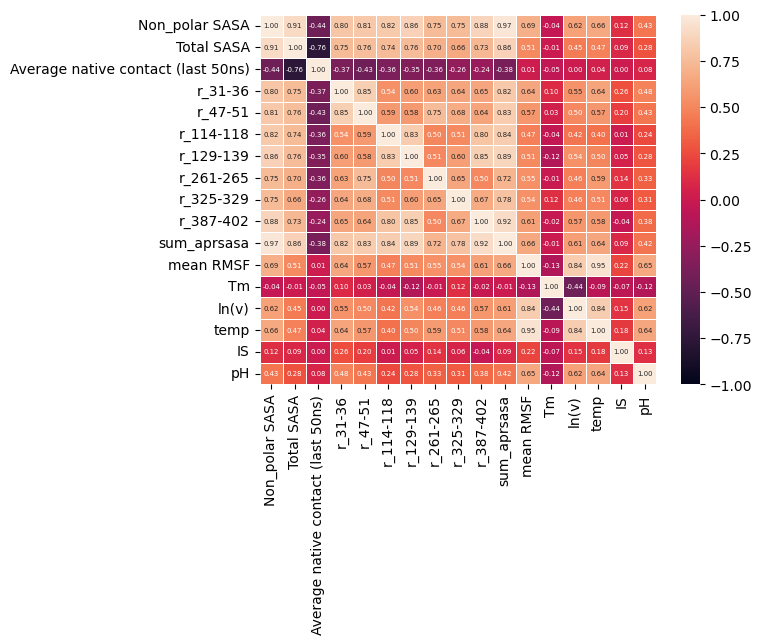

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# read dataframe
mean_rmsf_nc_sasa_agg_total_sasa = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp311023.xlsx",index_col=0)

df = mean_rmsf_nc_sasa_agg_total_sasa

# Set column 'Number' as the index
df.set_index('Number', inplace=True)

df = df.drop(['Condition'],axis = 1)

# To find the correlation among
# the columns using pearson method
df_correlation = df.corr(method ='pearson')

# save the pearson correlation to an excel
#df_correlation.to_excel("PearsonCorrelationMatrixPandas011123.xlsx")


# plot a heatmap
sns.heatmap(df_correlation, annot=True, annot_kws={"fontsize":5}, fmt=".2f",linewidth=.5, vmin = -1, vmax = 1)


In [83]:
df_correlation

,Non_polar SASA,Total SASA,Average native contact (last 50ns),r_31-36,r_47-51,r_114-118,r_129-139,r_261-265,r_325-329,r_387-402,sum_aprsasa,mean RMSF,Tm,ln(v),temp,IS,pH
Non_polar SASA,1.000000,0.907948,-0.438160,0.800258,0.814541,0.824265,0.863555,0.746217,0.746464,0.879519,0.974006,0.690069,-0.036795,0.622028,0.661968,0.118160,0.427731
Total SASA,0.907948,1.000000,-0.759793,0.747617,0.763851,0.743911,0.756676,0.695162,0.656762,0.731386,0.863313,0.514039,-0.007323,0.453103,0.471494,0.092016,0.279511
Average native contact (last 50ns),-0.438160,-0.759793,1.000000,-0.371163,-0.432095,-0.363086,-0.350659,-0.357573,-0.260635,-0.237737,-0.384751,0.007856,-0.053302,0.004051,0.042069,0.000919,0.077951
r_31-36,0.800258,0.747617,-0.371163,1.000000,0.846537,0.544229,0.603911,0.632661,0.644192,0.647781,0.818157,0.643044,0.095385,0.552391,0.638495,0.259854,0.483947
r_47-51,0.814541,0.763851,-0.432095,0.846537,1.000000,0.585527,0.578789,0.754315,0.675374,0.636320,0.828312,0.568338,0.031958,0.502293,0.574737,0.195150,0.426395
r_114-118,0.824265,0.743911,-0.363086,0.544229,0.585527,1.000000,0.833036,0.495594,0.512709,0.796057,0.841995,0.466562,-0.040660,0.421758,0.398575,0.005696,0.241530
r_129-139,0.863555,0.756676,-0.350659,0.603911,0.578789,0.833036,1.000000,0.505008,0.603252,0.846455,0.889178,0.510981,-0.121248,0.541774,0.499532,0.047282,0.282993
r_261-265,0.746217,0.695162,-0.357573,0.632661,0.754315,0.495594,0.505008,1.000000,0.648247,0.503254,0.718525,0.546646,-0.009034,0.464773,0.588464,0.141281,0.334628
r_325-329,0.746464,0.656762,-0.260635,0.644192,0.675374,0.512709,0.603252,0.648247,1.000000,0.669882,0.783768,0.540241,0.119900,0.464099,0.505867,0.062568,0.311010
r_387-402,0.879519,0.731386,-0.237737,0.647781,0.636320,0.796057,0.846455,0.503254,0.669882,1.000000,0.919785,0.611976,-0.019448,0.568827,0.582150,-0.038067,0.381793
